# Practice: 4.10 Coding Etiquette & Excel Reporting

## This script contains the following points:

## 1. Importing the data
## 2. Additional Analysis
### 2.1. Determine whether there is a difference in spending habits between the different U.S. regions
### 2.2. Exclusion flag for low-activity customers
### 2.3. Customer profiling
#### 2.3.1. Profling the age
#### 2.3.2. Profling the income
#### 2.3.4. Profling the number of dependents
#### 2.3.5. Profling based on ordered goods
## 3. Visualizations
### 3.1 Visualize the Distribution of profiles
### 3.1.1 Age Group Profile
### 3.1.2 Income Range
### 3.1.3 Household - Dependents
## 4. Aggregation basic statistics variables on the customer-profile level
### 4.1 Aggregation of the Age Groups
### 4.2 Aggregation of the Income Ranges
### 4.3 Aggregation of the Household
## 5. Comparison of Customer Profiles between Regions,Departments, Order_Frequency
### 5.1 Preparing the data frames for analysis
### 5.2 Comparison by Region
#### 5.2.1 Compare the Age Group and Region
#### 5.2.2 Compare the Income and Region
#### 5.2.3 Compare the Household and Region
#### 5.2.4 Compare the Department and Region
#### 5.2.5 Compare the Family Status and Region
### 5.3 Comparison by Departments
#### 5.3.1 Compare the Age Group and Department
#### 5.3.2 Compare the Income and Department
#### 5.3.3 Compare the Household and Department
#### 5.3.4 Compare the Family Status and Department
### 5.4 Comparison by Age Group
#### 5.4.1 Comparison Age Group and Order_Frequency
#### 5.4.2 Comparison Age Group and Income
#### 5.4.3 Comparison Age Group and Family Status
#### 5.4.4 Comparison Age Group and Household
### 5.5 Comparison by Income
#### 5.5.1 Comparison of Income and Spending
#### 5.5.2 Comparison of Income and Household
#### 5.5.3 Comparison of Income and Family Status
#### 5.5.4 Comparison of Income and Frequency
## 6. Additional Insights
### 6.1 Departments
#### 6.1.1 Top 10 Departments in Percentage
#### 6.1.2 Top 10 Departments by Sales(count)
### 6.2 Analyze Customer Behaviour
#### 6.2.1 Creating Hour Groups
#### 6.2.2 Analyze the order habits base on loalty status
#### 6.2.2.1 Total order price and loyalty status
#### 6.2.2.2 Price range and loyalty status
#### 6.2.2.3 time and loyalty status
#### 6.2.3 Analyze the order habits based on region
#### 6.2.3.1 Total order price and region
#### 6.2.3.2 Product range and region
#### 6.2.3.3 Time and region
#### 6.2.4 Analyze the order habits based on the connection of age and family status
#### 6.2.4.1 Total order and family status and age
#### 6.2.4.2 Days since last order and family status and age
#### 6.2.5 Analyze the order habits of different customer profiles based on frequency, price, and products
#### 6.2.5.1 Analyze the order habits based on frequency
#### 6.2.5.2 Analyze the order habits based on price
#### 6.2.5.3 Analyze the order habits based on products
### 6.3 Busiest Days in the Week
### 6.4 Busiest Hours of the Day
### 6.5 Difference in Expenditure depending on the Hour of the Day
## 7. Export the data

## 1. Importing the data

In [4]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# Creating a path for the data set import

path = r'/Users/daniel/Desktop/LEBEN/Data Analyst/Data Analytics Course/Data Immersion/Achievement 4/Master Folder - Instacart Basket Analysis 09.09.2024'

In [6]:
# Importing the data set orders_products_all_update.pkl

Instacart_final_version = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Instacart_final_version.pkl'))

In [7]:
# Importing the data set orders_products_all_update.pkl

df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_update.pkl'))

In [8]:
# Importing the data set orders_products_all.pkl

df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [9]:
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_update.pkl'))

In [10]:
# Check for the correct import

df_ords_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,number_of_dependents,fam_status,income,merge_indicator
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both


## 2. Analysis

### 2.1. Determine whether there is a difference in spending habits between the different U.S. regions

In [13]:
# Define the function to assign regions based on the state

def assign_region(state):
    if state in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        return 'Northeast'
    elif state in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        return 'Midwest'
    elif state in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        return 'South'
    elif state in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        return 'West'
    else:
        return 'Unkown Region'

In [14]:
# Create the region column by applying the defined function from above

df_ords_prods_cust['region'] = df_ords_prods_cust['state'].apply(assign_region)

In [15]:
# Check if the code was executed correctly by counting the entries for each region

df_ords_prods_cust['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [583]:
# Create a crosstab for the region and spending flag column

region_spending_crosstab = pd.crosstab(df_ords_prods_cust['region'], df_ords_prods_cust['spending_flag'], dropna = False)

In [585]:
# Create a clipboard to copy it to Excel for submission to the stakeholders

region_spending_crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [591]:
# Putting it on the clipoard for the final report

region_spending_crosstab.to_clipboard()

### 2.2. Exclusion flag for low-activity customers

In [19]:
# Create a new flag column for low-activity customers
# Exclude customers by the condition of max order <= 5

df_ords_prods_cust.loc[df_ords_prods_cust['max_order'] < 5, 'execution_flag'] = 'Exclude'

In [20]:
# Keep customers by the condition of max oder > 5

df_ords_prods_cust.loc[df_ords_prods_cust['max_order'] >= 5, 'execution_flag'] = 'Keep'

In [21]:
# Create a crosstab for proving the correct flaging of the rows

crosstab = pd.crosstab(df_ords_prods_cust['max_order'], df_ords_prods_cust['execution_flag'], dropna = False)

In [22]:
crosstab.to_clipboard()

In [23]:
# Check on the counts of keep and exclude entries, which is important for creating a new data frame

df_ords_prods_cust['execution_flag'].value_counts()

execution_flag
Keep       30964564
Exclude     1440295
Name: count, dtype: int64

In [24]:
# Create a new data set by excluding the low-activity customers

df_ords_prods_all = df_ords_prods_cust[df_ords_prods_cust['execution_flag'] == 'Keep']

In [25]:
df_ords_prods_all.shape

(30964564, 35)

__Commen:__ Execution successful, same row count returned like above.

In [27]:
# Remove the unnecessary execution flag

df_ords_prods_all=df_ords_prods_all.drop(columns=['execution_flag'])

In [28]:
# Export the new data frame

df_ords_prods_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_update.pkl'))

### 2.3. Customer profiling

#### 2.3.1. Profling the age

In [31]:
#Profiling the age in three groups: young adult (18-25 years), adult (40-59 years), old adult (60+)

df_ords_prods_all.loc[df_ords_prods_all['age'] <= 25, 'age_profile'] = 'young adult'

df_ords_prods_all.loc[(df_ords_prods_all['age'] <= 40) & (df_ords_prods_all['age'] > 25), 'age_profile'] = 'adult'

df_ords_prods_all.loc[(df_ords_prods_all['age'] <= 65) & (df_ords_prods_all['age'] > 40), 'age_profile'] = 'old adult'

df_ords_prods_all.loc[df_ords_prods_all['age'] > 65, 'age_profile'] = 'elderly'

In [32]:
df_ords_prods_all['age_profile'].value_counts()

age_profile
old adult      12085297
elderly         7730834
adult           7283915
young adult     3864518
Name: count, dtype: int64

#### 2.3.2. Profling the income

In [34]:
# Profiling the annual income in three groups: low income (< $28.000), middle income ($28.001 - $55.000), upper income (> $55.000)

df_ords_prods_all.loc[df_ords_prods_all['income'] <= 50000, 'income_range'] = 'low income'

df_ords_prods_all.loc[(df_ords_prods_all['income'] >50000) & (df_ords_prods_all['income'] <=80000), 'income_range'] = 'middle income'

df_ords_prods_all.loc[df_ords_prods_all['income'] > 80000, 'income_range'] = 'upper income'

In [35]:
df_ords_prods_all['income_range'].value_counts()

income_range
upper income     19972644
middle income     7629366
low income        3362554
Name: count, dtype: int64

#### 2.3.4. Profling the number of dependents

In [37]:
# Profiling the number of dependents: 0 (single household), 1-2 (middle household), 3 or more (big household)

df_ords_prods_all.loc[df_ords_prods_all['number_of_dependents'] == 0, 'household'] = 'single household'

df_ords_prods_all.loc[df_ords_prods_all['number_of_dependents'].isin([1,2]), 'household'] = 'middle household'

df_ords_prods_all.loc[df_ords_prods_all['number_of_dependents'] >= 3, 'household'] = 'big household'

In [38]:
df_ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,number_of_dependents,fam_status,income,merge_indicator,region,age_profile,income_range,household
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,31,2019-02-17,3,married,40423,both,South,adult,low income,big household
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,31,2019-02-17,3,married,40423,both,South,adult,low income,big household
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,...,31,2019-02-17,3,married,40423,both,South,adult,low income,big household
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,...,31,2019-02-17,3,married,40423,both,South,adult,low income,big household
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,31,2019-02-17,3,married,40423,both,South,adult,low income,big household


In [39]:
df_ords_prods_all['household'].value_counts()

household
middle household    15452367
big household        7772516
single household     7739681
Name: count, dtype: int64

#### 2.3.5. Profling based on ordered goods

In [41]:
# Profile based on ordered goods (single adult, young parent): more suitable and less suitable goods(alcohol, pets, bulk)

df_ords_prods_all.loc[df_ords_prods_all['department_id'].isin([4,16,19,7,1,13,3,15,20,9,17,12,14,11,18,6,21,2]), 'suitable_goods'] = 'more suitable'

df_ords_prods_all.loc[df_ords_prods_all['department_id'].isin([5,8,10]), 'suitable_goods'] = 'less suitable'

In [42]:
df_ords_prods_all['suitable_goods'].value_counts()

suitable_goods
more suitable    30693426
less suitable      271138
Name: count, dtype: int64

## 3. Visualizations

### 3.1 Visualize the Distribution of proflies

In [45]:
# Import library for colormap

from matplotlib.colors import LinearSegmentedColormap

### 3.1.1 Age Group Profile

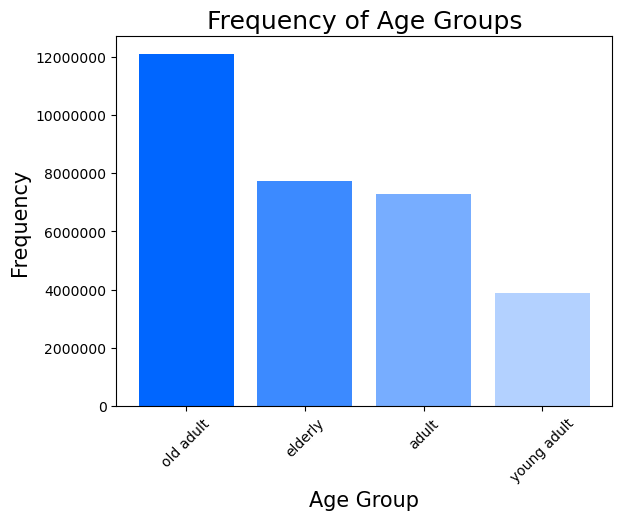

In [535]:
# Create a bar chart for the age profile flag

cmap = LinearSegmentedColormap.from_list("custom_blue", ["#0066ff", "#b3d1ff"], N=256)

age_counts = df_ords_prods_all['age_profile'].value_counts()

fig1, ax1 = plt.subplots()
ax1.bar(age_counts.index, age_counts.values, color=cmap(np.linspace(0,1,len(age_counts))))
ax1.set_xlabel('Age Group', fontsize=15)
ax1.set_ylabel('Frequency', fontsize=15)
ax1.set_title('Frequency of Age Groups', fontsize=18)
plt.xticks(rotation=45)

ax1.ticklabel_format(style='plain', axis='y')

plt.show()

In [537]:
# Export the visualization

fig1.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'frequncy_age_groups.png'), bbox_inches='tight')

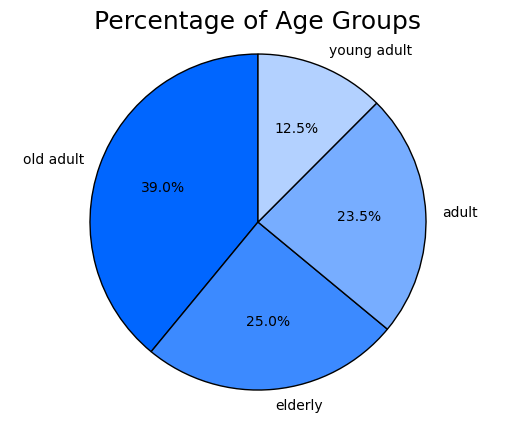

In [49]:
# Create a pie chart to show the percentage of age groups

age_counts = df_ords_prods_all['age_profile'].value_counts()

cmap = LinearSegmentedColormap.from_list("custom_blue", ["#0066ff", "#b3d1ff"], N=256)

fig2, ax2 = plt.subplots()
ax2.pie(age_counts,
        labels=age_counts.index,
        autopct='%1.1f%%',
        colors=cmap(np.linspace(0,1,len(age_counts))),
        wedgeprops={'edgecolor':'black'},
        startangle=90)

ax2.axis('equal')
plt.title('Percentage of Age Groups', fontsize=18)
plt.show()

In [50]:
# Export the visualization

fig2.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'percentage_age_groups.png'), bbox_inches='tight')

### 3.1.2 Income Range

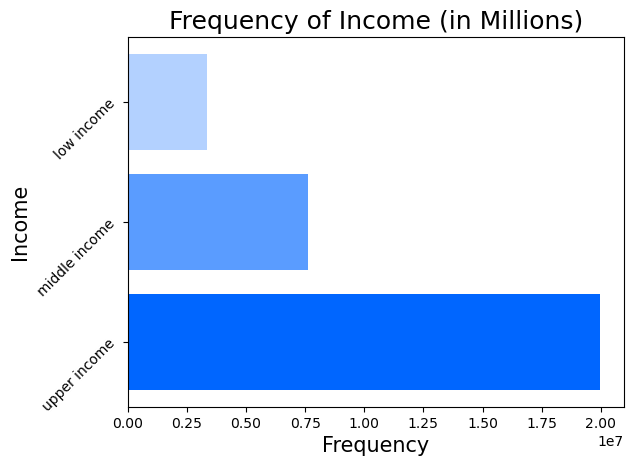

In [529]:
# Create a horizontal bar chart to show the frequency of the income ranges

cmap = LinearSegmentedColormap.from_list("custom_blue", ["#0066ff", "#b3d1ff"], N=256)

income_range_counts = df_ords_prods_all['income_range'].value_counts()

fig3, ax3 = plt.subplots()
ax3.barh(income_range_counts.index, income_range_counts.values, color=cmap(np.linspace(0,1,len(income_range_counts))))
ax3.set_xlabel('Frequency', fontsize=15)
ax3.set_ylabel('Income', fontsize=15)
ax3.set_title('Frequency of Income (in Millions)', fontsize=18)
plt.yticks(rotation=45)
plt.show()

In [531]:
# Export the visualization

fig3.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'frequency_income.png'), bbox_inches='tight')

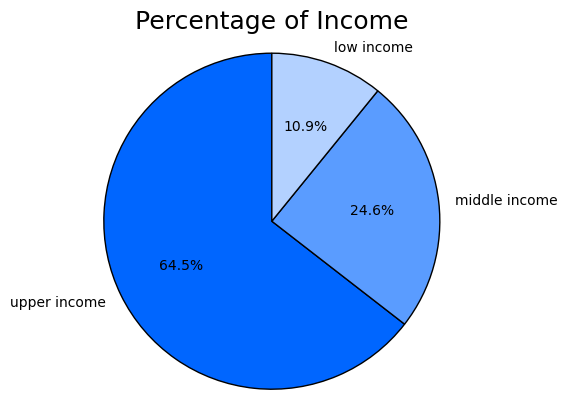

In [54]:
# Create a pie chart to show the percentage of income ranges

income_range_counts = df_ords_prods_all['income_range'].value_counts()

cmap = LinearSegmentedColormap.from_list("custom_blue", ["#0066ff", "#b3d1ff"], N=256)

fig4, ax4 = plt.subplots()
ax4.pie(income_range_counts,
        labels=income_range_counts.index,
        autopct='%1.1f%%',
        colors=cmap(np.linspace(0,1,len(income_range_counts))),
        wedgeprops={'edgecolor':'black'},
        startangle=90)

ax4.axis('equal')
plt.title('Percentage of Income', fontsize=18)
plt.show()

In [55]:
# Export the visualization

fig4.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'percentage_income.png'), bbox_inches='tight')

### 3.1.3 Household - Dependents

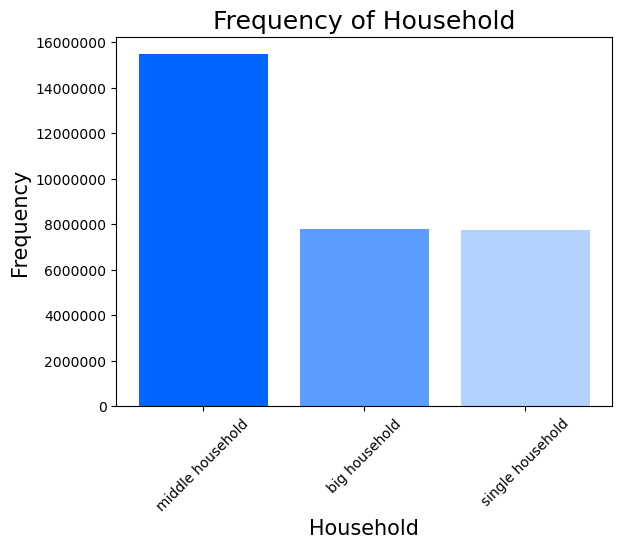

In [525]:
# Create a bar chart to show the household size

cmap = LinearSegmentedColormap.from_list("custom_blue", ["#0066ff", "#b3d1ff"], N=256)

household_counts = df_ords_prods_all['household'].value_counts()

fig5, ax5 = plt.subplots()
ax5.bar(household_counts.index, household_counts.values, color=cmap(np.linspace(0,1,len(household_counts))))
ax5.set_xlabel('Household', fontsize=15)
ax5.set_ylabel('Frequency', fontsize=15)
ax5.set_title('Frequency of Household', fontsize=18)

ax5.ticklabel_format(style='plain', axis='y')

plt.xticks(rotation=45)
plt.show()

In [527]:
# Export the visualization

fig5.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'frequency_household.png'), bbox_inches='tight')

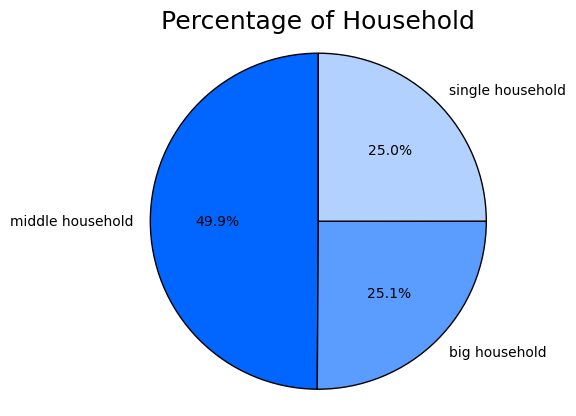

In [59]:
# Create a pie chart to show the percentage of household

household_counts = df_ords_prods_all['household'].value_counts()

cmap = LinearSegmentedColormap.from_list("custom_blue", ["#0066ff", "#b3d1ff"], N=256)

fig6, ax6 = plt.subplots()
ax6.pie(household_counts,
        labels=household_counts.index,
        autopct='%1.1f%%',
        colors=cmap(np.linspace(0,1,len(household_counts))),
        wedgeprops={'edgecolor':'black'},
        startangle=90)

ax6.axis('equal')
plt.title('Percentage of Household', fontsize=18)
plt.show()

In [60]:
# Export the visualization

fig6.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'percentage_household.png'), bbox_inches='tight')

## 4. Aggregation basic statistics variables on customer-profile level

In [62]:
# 4.1 Create a suitable subset for the aggregation of basic statistics

df_ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,number_of_dependents,fam_status,income,merge_indicator,region,age_profile,income_range,household,suitable_goods
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,2019-02-17,3,married,40423,both,South,adult,low income,big household,more suitable
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,2019-02-17,3,married,40423,both,South,adult,low income,big household,more suitable
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,...,2019-02-17,3,married,40423,both,South,adult,low income,big household,more suitable
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,...,2019-02-17,3,married,40423,both,South,adult,low income,big household,more suitable
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,2019-02-17,3,married,40423,both,South,adult,low income,big household,more suitable


In [63]:
df_ords_prods_all.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_day_update', 'busiest_hours_of_the_day', 'max_order',
       'loyalty_flag', 'average_prices', 'spending_flag',
       'median_days_since_last_order', 'frequency_flag', 'first_name',
       'last_name', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'fam_status', 'income', 'merge_indicator',
       'region', 'age_profile', 'income_range', 'household', 'suitable_goods'],
      dtype='object')

In [64]:
df_customer_profile = df_ords_prods_all.groupby(['user_id', 'order_number', 'days_since_last_order', 'loyalty_flag','frequency_flag', 'spending_flag', 'region', 'age_profile', 'fam_status', 'income_range', 'household', 'suitable_goods'])['prices'].sum().reset_index()

In [65]:
df_customer_profile

,user_id,order_number,days_since_last_order,loyalty_flag,frequency_flag,spending_flag,region,age_profile,fam_status,income_range,household,suitable_goods,prices
0,1,1,0.0,New customer,Regular customer,Low spender,South,adult,married,low income,big household,more suitable,31.6
1,1,2,15.0,New customer,Regular customer,Low spender,South,adult,married,low income,big household,more suitable,35.4
2,1,3,21.0,New customer,Regular customer,Low spender,South,adult,married,low income,big household,more suitable,28.2
3,1,4,29.0,New customer,Regular customer,Low spender,South,adult,married,low income,big household,more suitable,26.0
4,1,5,28.0,New customer,Regular customer,Low spender,South,adult,married,low income,big household,more suitable,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024904,206209,9,22.0,Regular customer,Regular customer,Low spender,Midwest,elderly,married,upper income,big household,more suitable,26.2
1024905,206209,10,29.0,Regular customer,Regular customer,Low spender,Midwest,elderly,married,upper income,big household,more suitable,64.7
1024906,206209,11,30.0,Regular customer,Regular customer,Low spender,Midwest,elderly,married,upper income,big household,more suitable,56.1
1024907,206209,12,18.0,Regular customer,Regular customer,Low spender,Midwest,elderly,married,upper income,big household,more suitable,131.5


In [66]:
# Change the name of the prices column to total_order_price

df_customer_profile.rename(columns={'prices' : 'total_order_price'}, inplace = True)

In [67]:
df_customer_profile

,user_id,order_number,days_since_last_order,loyalty_flag,frequency_flag,spending_flag,region,age_profile,fam_status,income_range,household,suitable_goods,total_order_price
0,1,1,0.0,New customer,Regular customer,Low spender,South,adult,married,low income,big household,more suitable,31.6
1,1,2,15.0,New customer,Regular customer,Low spender,South,adult,married,low income,big household,more suitable,35.4
2,1,3,21.0,New customer,Regular customer,Low spender,South,adult,married,low income,big household,more suitable,28.2
3,1,4,29.0,New customer,Regular customer,Low spender,South,adult,married,low income,big household,more suitable,26.0
4,1,5,28.0,New customer,Regular customer,Low spender,South,adult,married,low income,big household,more suitable,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024904,206209,9,22.0,Regular customer,Regular customer,Low spender,Midwest,elderly,married,upper income,big household,more suitable,26.2
1024905,206209,10,29.0,Regular customer,Regular customer,Low spender,Midwest,elderly,married,upper income,big household,more suitable,64.7
1024906,206209,11,30.0,Regular customer,Regular customer,Low spender,Midwest,elderly,married,upper income,big household,more suitable,56.1
1024907,206209,12,18.0,Regular customer,Regular customer,Low spender,Midwest,elderly,married,upper income,big household,more suitable,131.5


### 4.1 Aggregation of the Age Groups

In [69]:
# Show aggregated values of the age groups

age_groups_agg = df_customer_profile.groupby('age_profile').agg({'days_since_last_order':['mean', 'min', 'max'], 'total_order_price' :['mean', 'min', 'max']})

In [70]:
age_groups_agg

days_since_last_order            total_order_price             
                             mean  min   max              mean  min     max
age_profile                                                                
adult                   15.374654  0.0  30.0         76.120078  0.0   775.7
elderly                 15.421861  0.0  30.0         76.073158  0.0   741.5
old adult               15.434500  0.0  30.0         76.211949  0.0  1092.2
young adult             15.411946  0.0  30.0         76.275757  1.0   684.3

### 4.2 Aggregation of the Income Ranges

In [72]:
income_ranges_agg = df_customer_profile.groupby('income_range').agg({'days_since_last_order':['mean', 'min', 'max'], 'total_order_price' :['mean', 'min', 'max']})

In [73]:
income_ranges_agg

days_since_last_order            total_order_price             
                               mean  min   max              mean  min     max
income_range                                                                 
low income                15.803326  0.0  30.0         48.340670  1.0   712.0
middle income             15.386584  0.0  30.0         78.044315  1.0   775.7
upper income              15.322558  0.0  30.0         82.774215  0.0  1092.2

### 4.3 Aggregation of the Household

In [75]:
household_agg =df_customer_profile.groupby('household').agg({'days_since_last_order':['mean', 'min', 'max'], 'total_order_price' :['mean', 'min', 'max']})

In [76]:
household_agg

days_since_last_order            total_order_price       \
                                  mean  min   max              mean  min   
household                                                                  
big household                15.380093  0.0  30.0         76.462488  0.0   
middle household             15.447202  0.0  30.0         76.079385  0.0   
single household             15.383840  0.0  30.0         76.031853  0.0   

                          
                     max  
household                 
big household     1092.2  
middle household   852.5  
single household   736.7

### 4.4 Aggregation of the loyalty_flag

In [78]:
loyalty_flag_agg =df_customer_profile.groupby('loyalty_flag').agg({'days_since_last_order':['mean', 'min', 'max'], 'total_order_price' :['mean', 'min', 'max']})

In [79]:
loyalty_flag_agg

days_since_last_order            total_order_price       \
                                  mean  min   max              mean  min   
loyalty_flag                                                               
Loyal customer                8.241158  0.0  30.0         68.667095  1.1   
New customer                 17.457073  0.0  30.0         73.627075  0.0   
Regular customer             14.361650  0.0  30.0         77.493455  0.0   

                          
                     max  
loyalty_flag              
Loyal customer     450.7  
New customer       741.5  
Regular customer  1092.2

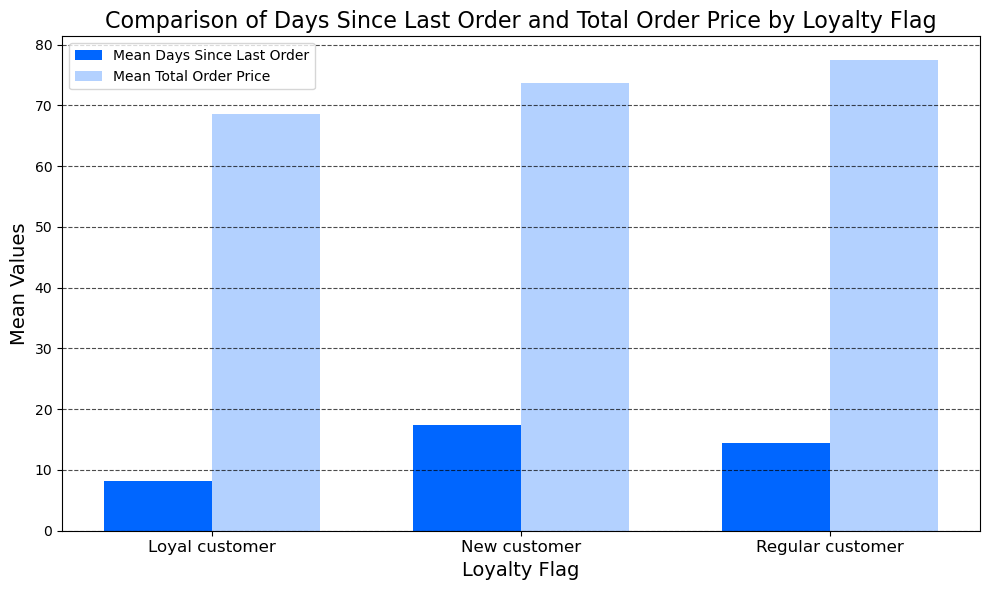

In [539]:
# Extract mean values from loyalty_flag_agg
days_mean = loyalty_flag_agg['days_since_last_order']['mean']
price_mean = loyalty_flag_agg['total_order_price']['mean']

# Set the x positions for the bars
x = np.arange(len(loyalty_flag_agg))

# Define the width of the bars
width = 0.35  

# Create subplots for better control of the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for 'days_since_last_order'
rects1 = ax.bar(x - width/2, days_mean, width, label='Mean Days Since Last Order', color='#0066ff')

# Plot bars for 'total_order_price'
rects2 = ax.bar(x + width/2, price_mean, width, label='Mean Total Order Price', color='#b3d1ff')

# Adding labels, title, and formatting the x-axis
ax.set_xlabel('Loyalty Flag', fontsize=14)
ax.set_ylabel('Mean Values', fontsize=14)
ax.set_title('Comparison of Days Since Last Order and Total Order Price by Loyalty Flag', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(loyalty_flag_agg.index, fontsize=12)

# Adding a legend to the plot
ax.legend()

# Add gridlines for clarity
ax.grid(axis='y', color='black', linestyle='dashed', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [81]:
# Export the visualization

fig.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'days_total_order_loyalty.png'), bbox_inches='tight')

## 5. Comparison of Customer Profiles between Regions, Departments, Age Group, Income

### 5.1 Preparing the data frames for analysis

In [84]:
# Import the department data frame for the comparison

dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [85]:
# Check for the correct import

dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [86]:
# Rename the unnamed column to department_id for merging the two data sets

dept.rename(columns= {'Unnamed: 0' : 'department_id'}, inplace = True)

In [87]:
dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [88]:
# Merging the df_ords_prods_all with the dept data set on the department_id column

df_comparison = df_ords_prods_all.merge(dept, on ='department_id', indicator=True)

In [89]:
df_comparison.shape

(30964564, 40)

In [90]:
df_comparison['department'].value_counts()

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

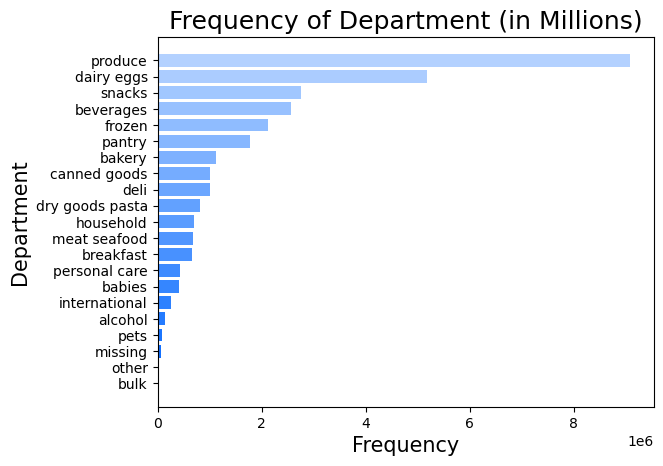

In [521]:
cmap = LinearSegmentedColormap.from_list("custom_blue", ["#0066ff", "#b3d1ff"], N=256)

department_counts = df_comparison['department'].value_counts()
department_counts = department_counts.sort_values(ascending=True)

fig7, ax7 = plt.subplots()
ax7.barh(department_counts.index, department_counts.values,color=cmap(np.linspace(0,1,len(department_counts))))
ax7.set_xlabel('Frequency', fontsize=15)
ax7.set_ylabel('Department', fontsize=15)
ax7.set_title('Frequency of Department (in Millions)', fontsize=18)
plt.show()

In [523]:
# Export the visualization

fig7.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'frequncy_department.png'), bbox_inches='tight')

### 5.2 Comparison by Region

#### 5.2.1 Compare the Age Group and Region

In [95]:
age_region_comparison = pd.crosstab(df_comparison['age_profile'], df_comparison['region'],dropna = False)

In [96]:
age_region_comparison

region,Midwest,Northeast,South,West
age_profile,,,,
adult,1693049,1273976,2460039,1856851
elderly,1799606,1394490,2549034,1987704
old adult,2870703,2116310,3987077,3111207
young adult,898155,679909,1314989,971465


In [593]:
# Putting it on the clipboard for the final report

age_region_comparison.to_clipboard()

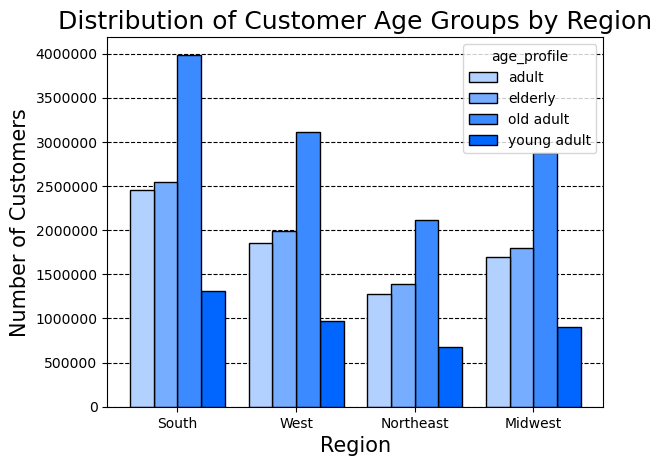

In [517]:
# Create a histogram for the comparison between age group and region

cmap = LinearSegmentedColormap.from_list("custom_blue", ["#b3d1ff", "#0066ff"], N=256)

fig8, ax8 = plt.subplots()

# Convert the cmap to a list of colors
colors = cmap(np.linspace(0, 1, len(df_comparison['age_profile'].unique()))).tolist()

# Creating the grouped bar plot (dodge multiple)
sns.histplot(data=df_comparison, x='region', hue='age_profile', multiple='dodge', shrink=0.8, alpha=1, palette=colors, ax=ax8)

# Setting grid, labels, and title
ax8.set_axisbelow(True)
ax8.grid(axis='y', color='black', linestyle='dashed')

# Using ax8 for the labels and title
ax8.set_xlabel('Region', fontsize=15)
ax8.set_ylabel('Number of Customers', fontsize=15)
ax8.set_title('Distribution of Customer Age Groups by Region', fontsize=18)

ax8.ticklabel_format(style='plain', axis='y')

plt.show()

In [519]:
# Export the visualization

fig8.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'age_region_comparison.png'), bbox_inches='tight')

#### 5.2.2 Compare the Income and Region

In [100]:
income_region_comparison = pd.crosstab(df_comparison['income_range'], df_comparison['region'],dropna = False)

In [101]:
income_region_comparison

region,Midwest,Northeast,South,West
income_range,,,,
low income,783764,587137,1142572,849081
middle income,1761179,1320026,2559723,1988438
upper income,4716570,3557522,6608844,5089708


In [597]:
# Putting it on the clipboard for the final report

income_region_comparison.to_clipboard()

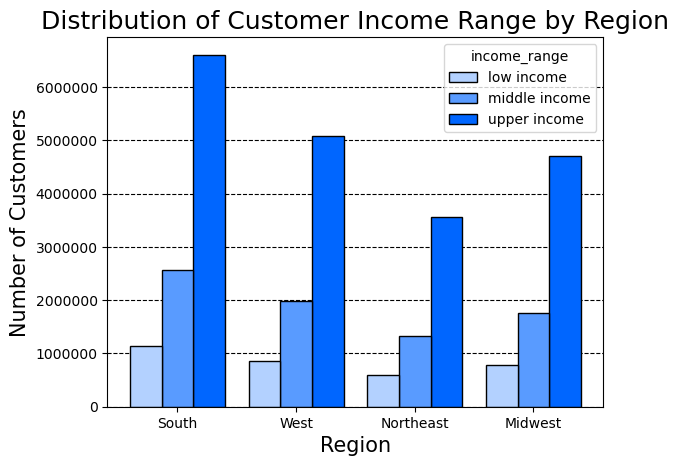

In [509]:
# Create a histogram for the comparison between income range and region

cmap = LinearSegmentedColormap.from_list("custom_blue", ["#b3d1ff", "#0066ff"], N=256)

fig9, ax9 = plt.subplots()

# Convert the cmap to a list of colors
colors = cmap(np.linspace(0, 1, len(df_comparison['income_range'].unique()))).tolist()

# Creating the grouped bar plot (dodge multiple) with correct axis reference
sns.histplot(data=df_comparison, x='region', hue='income_range', multiple='dodge', shrink=0.8, alpha=1, palette=colors, ax=ax9)

# Setting grid, labels, and title on ax9
ax9.set_axisbelow(True)
ax9.grid(axis='y', color='black', linestyle='dashed')
ax9.set_xlabel('Region', fontsize=15)
ax9.set_ylabel('Number of Customers', fontsize=15)
ax9.set_title('Distribution of Customer Income Range by Region', fontsize=18)

ax9.ticklabel_format(style='plain', axis='y')

plt.show()

In [515]:
# Export the visualization

fig9.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'income_region_comparison.png'), bbox_inches='tight')

#### 5.2.3 Compare the Household and Region

In [105]:
household_region_comparison = pd.crosstab(df_comparison['household'], df_comparison['region'],dropna = False)

In [106]:
household_region_comparison

region,Midwest,Northeast,South,West
household,,,,
big household,1787286,1381233,2585864,2018133
middle household,3651411,2728970,5143342,3928644
single household,1822816,1354482,2581933,1980450


In [599]:
# Putting it on the clipboard for the final report

household_region_comparison.to_clipboard()

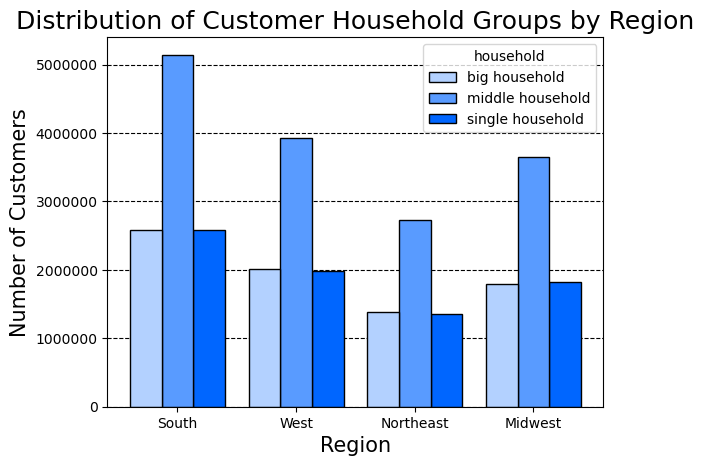

In [507]:
# Create a histogram for the comparison between household and region

cmap = LinearSegmentedColormap.from_list("custom_blue", ["#b3d1ff", "#0066ff"], N=256)

fig10, ax10 = plt.subplots()

# Convert the cmap to a list of colors
colors = cmap(np.linspace(0, 1, len(df_comparison['household'].unique()))).tolist()

# Creating the grouped bar plot (dodge multiple) with correct axis reference
sns.histplot(data=df_comparison, x='region', hue='household', multiple='dodge', shrink=0.8, alpha=1, palette=colors, ax=ax10)

# Setting grid, labels, and title on ax10
ax10.set_axisbelow(True)
ax10.grid(axis='y', color='black', linestyle='dashed')
ax10.set_xlabel('Region', fontsize=15)
ax10.set_ylabel('Number of Customers', fontsize=15)
ax10.set_title('Distribution of Customer Household Groups by Region', fontsize=18)

ax10.ticklabel_format(style='plain', axis='y')

plt.show() 

In [513]:
# Export the visualization

fig10.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'household_region_comparison.png'), bbox_inches='tight')

#### 5.2.4 Compare the Department and Region

In [110]:
department_region_comparison = pd.crosstab(df_comparison['department'], df_comparison['region'],dropna = False)

In [111]:
department_region_comparison_sorted = department_region_comparison.sort_index(ascending=True)

In [112]:
department_region_comparison_sorted

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


In [601]:
# Putting it on the clipboard for the final report

department_region_comparison_sorted.to_clipboard()

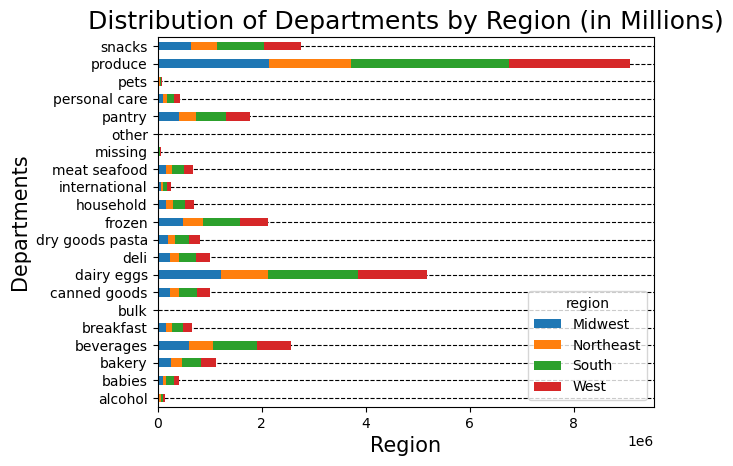

In [503]:
# Creating the horizontal, stacked bar chart for the comparison between departments and region
fig11, ax11 = plt.subplots()

# Plotting the horizontal stacked bar plot
bar = department_region_comparison_sorted.plot.barh(stacked=True, ax=ax11)

# Overlay a grid behind the bars
ax11.set_axisbelow(True)  # Ensure grid is behind bars
ax11.grid(axis='y', color='black', linestyle='dashed')

# General formatting for labels, title
ax11.set_title('Distribution of Departments by Region (in Millions)', fontsize=18)
ax11.set_ylabel('Departments', fontsize=15)
ax11.set_xlabel('Region', fontsize=15)

plt.show()

In [505]:
# Export the visualization

fig11.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'department_region_comparison.png'), bbox_inches='tight')

#### 5.2.5 Compare the Family Status and Region

In [116]:
family_status_region_comparison = pd.crosstab(df_comparison['fam_status'], df_comparison['region'],dropna = False)

In [117]:
family_status_region_comparison

region,Midwest,Northeast,South,West
fam_status,,,,
divorced/widowed,617198,478767,877314,671992
living with parents and siblings,351435,256430,505457,367850
married,5087262,3853773,7223749,5578927
single,1205618,875715,1704619,1308458


In [603]:
# Putting it on the clipboard for the final report

family_status_region_comparison.to_clipboard()

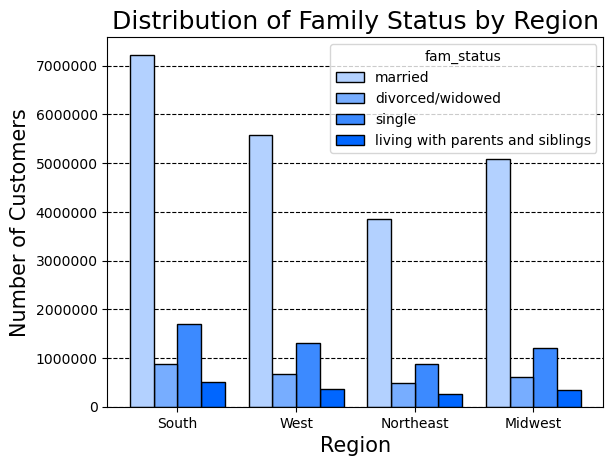

In [491]:
# Create a histogram for the comparison between family status and region

cmap = LinearSegmentedColormap.from_list("custom_blue", ["#b3d1ff", "#0066ff"], N=256)

fig12, ax12 = plt.subplots()

# Convert the cmap to a list of colors
colors = cmap(np.linspace(0, 1, len(df_comparison['fam_status'].unique()))).tolist()

# Creating the grouped bar plot (dodge multiple)
sns.histplot(data=df_comparison, x='region', hue='fam_status', multiple='dodge', shrink=0.8, alpha=1, palette=colors, ax=ax12)

# Setting grid, labels, and title
ax12.set_axisbelow(True)
ax12.grid(axis='y', color='black', linestyle='dashed')

# Using ax12 for the labels and title
ax12.set_xlabel('Region', fontsize=15)
ax12.set_ylabel('Number of Customers', fontsize=15)
ax12.set_title('Distribution of Family Status by Region', fontsize=18)

ax12.ticklabel_format(style='plain', axis='y')

plt.show()

In [497]:
# Export the visualization

fig12.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'fam_status_region_comparison.png'), bbox_inches='tight')

### 5.3 Comparison by Departments

#### 5.3.1 Compare the Age Group and Department

In [122]:
age_department_comparison = pd.crosstab(df_comparison['department'], df_comparison['age_profile'],dropna = False)

In [123]:
age_department_comparison

age_profile,adult,elderly,old adult,young adult
department,,,,
alcohol,34623,34691,56125,19188
babies,96430,100162,162566,51234
bakery,262625,278458,439872,139873
beverages,597066,646414,1010078,318343
breakfast,156557,165491,263325,85477
bulk,7797,8336,13012,4306
canned goods,239510,251940,394312,126312
dairy eggs,1224854,1291039,2013796,647493
deli,236817,250463,391999,124555


In [605]:
# Putting it on the clipboard for the final report

age_department_comparison.to_clipboard()

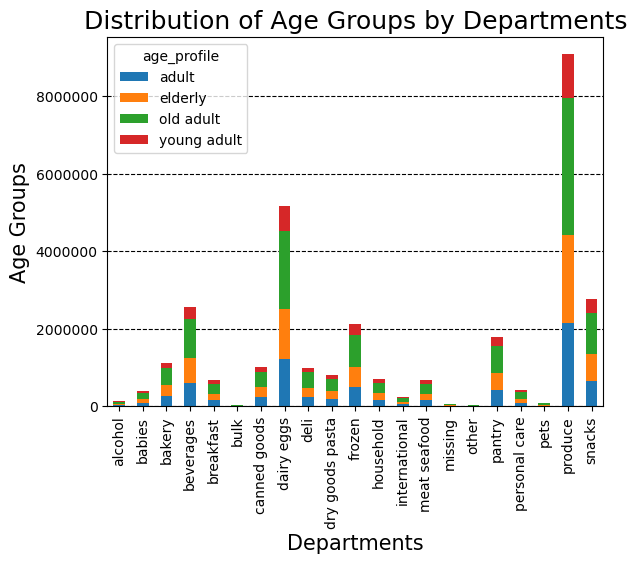

In [487]:
# Create a stacked bar chart for the distribution of departments by age groups

# Creating the horizontal, stacked bar chart for the comparison between departments and age groups
fig13, ax13 = plt.subplots()

# Plotting the horizontal stacked bar plot
bar2 = age_department_comparison.plot.bar(stacked=True, ax=ax13)

# Overlay a grid behind the bars
ax13.set_axisbelow(True)  # Ensure grid is behind bars
ax13.grid(axis='y', color='black', linestyle='dashed')

# General formatting for labels, title
ax13.set_title('Distribution of Age Groups by Departments', fontsize=18)
ax13.set_ylabel('Age Groups', fontsize=15)
ax13.set_xlabel('Departments', fontsize=15)

ax13.ticklabel_format(style='plain', axis='y')

plt.show()

In [489]:
# Export the visualization

fig13.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'age_dept_comparison.png'), bbox_inches='tight')

#### 5.3.2 Compare the Income and Department

In [127]:
income_range_department_comparison = pd.crosstab(df_comparison['department'], df_comparison['income_range'],dropna = False)

In [128]:
income_range_department_comparison

income_range,low income,middle income,upper income
department,,,
alcohol,18047,32061,94519
babies,29240,101958,279194
bakery,106757,274591,739480
beverages,383121,612224,1576556
breakfast,91408,163800,415642
bulk,4676,8443,20332
canned goods,78975,252544,680555
dairy eggs,502363,1281753,3393066
deli,106448,247792,649594


In [607]:
# Putting it on the clipboard for the final report

income_range_department_comparison.to_clipboard()

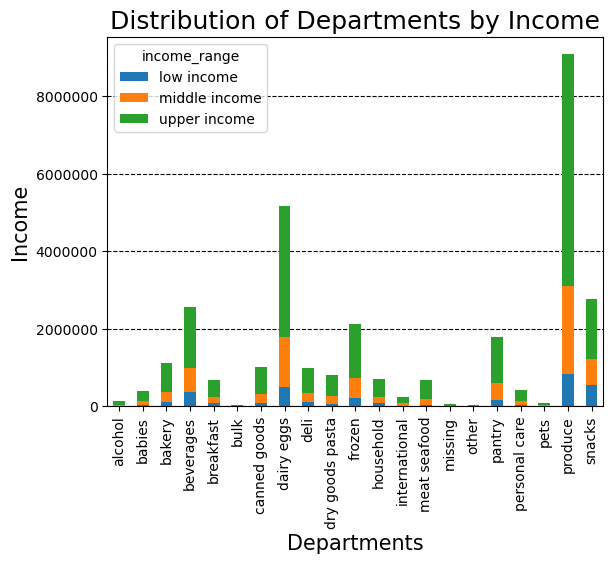

In [483]:
# Create a stacked bar chart for the distribution of departments by income ranges

# Creating the horizontal, stacked bar chart for the comparison between departments and income
fig14, ax14 = plt.subplots()

# Plotting the horizontal stacked bar plot
bar3 = income_range_department_comparison.plot.bar(stacked=True, ax=ax14)

# Overlay a grid behind the bars
ax14.set_axisbelow(True)  # Ensure grid is behind bars
ax14.grid(axis='y', color='black', linestyle='dashed')

# General formatting for labels, title
ax14.set_title('Distribution of Departments by Income', fontsize=18)
ax14.set_ylabel('Income', fontsize=15)
ax14.set_xlabel('Departments', fontsize=15)

ax14.ticklabel_format(style='plain', axis='y')

plt.show()

In [485]:
# Export the visualization

fig14.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'income_dept_comparison.png'), bbox_inches='tight')

#### 5.3.3 Compare the Household and Department

In [132]:
household_department_comparison = pd.crosstab(df_comparison['department'], df_comparison['household'],dropna = False)

In [133]:
household_department_comparison

household,big household,middle household,single household
department,,,
alcohol,37333,70467,36827
babies,102585,204479,103328
bakery,279822,559611,281395
beverages,640927,1285633,645341
breakfast,167322,337096,166432
bulk,8403,17048,8000
canned goods,255325,505729,251020
dairy eggs,1296264,2586542,1294376
deli,252592,497860,253382


In [609]:
# Putting it on the clipboard for the final report

household_department_comparison.to_clipboard()

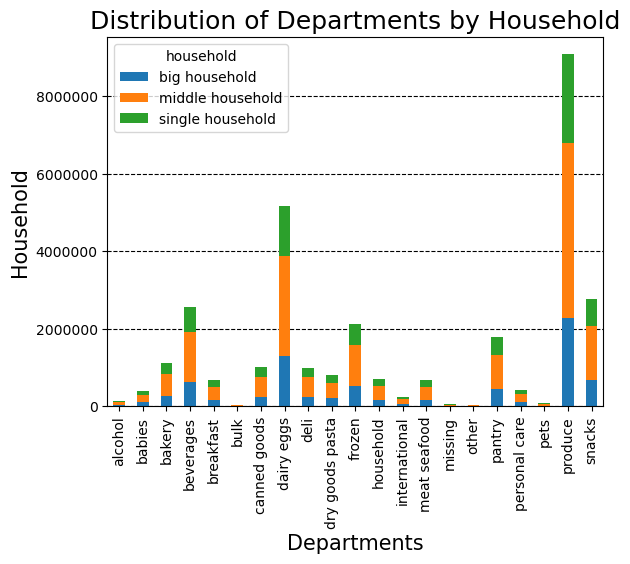

In [477]:
# Create a stacked bar chart for the distribution of departments by household

# Creating the horizontal, stacked bar chart for the comparison between departments and household
fig15, ax15 = plt.subplots()

# Plotting the horizontal stacked bar plot
bar4 = household_department_comparison.plot.bar(stacked=True, ax=ax15)

# Overlay a grid behind the bars
ax15.set_axisbelow(True)  # Ensure grid is behind bars
ax15.grid(axis='y', color='black', linestyle='dashed')

# General formatting for labels, title
ax15.set_title('Distribution of Departments by Household', fontsize=18)
ax15.set_ylabel('Household', fontsize=15)
ax15.set_xlabel('Departments', fontsize=15)

ax15.ticklabel_format(style='plain', axis='y')

plt.show()

In [481]:
# Export the visualization

fig15.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'household_dept_comparison.png'), bbox_inches='tight')

#### 5.3.4 Compare the Family Status and Department

In [137]:
fam_status_department_comparison = pd.crosstab(df_comparison['department'], df_comparison['fam_status'],dropna = False)

In [138]:
fam_status_department_comparison

fam_status,divorced/widowed,living with parents and siblings,married,single
department,,,,
alcohol,11859,8379,99421,24968
babies,34351,19381,287683,68977
bakery,95735,53684,785749,185660
beverages,220879,119107,1807453,424462
breakfast,56590,33198,471220,109842
bulk,2676,1633,23818,5324
canned goods,84268,48477,712577,166752
dairy eggs,442602,250207,3632599,851774
deli,86749,48119,702333,166633


In [611]:
# Putting it on the clipboard for the final report

fam_status_department_comparison.to_clipboard()

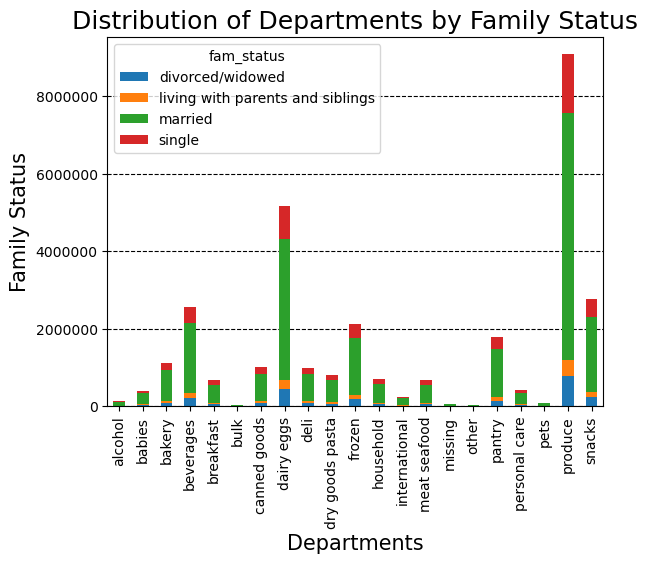

In [473]:
# Create a stacked bar chart for the distribution of departments by family status

# Creating the horizontal, stacked bar chart for the comparison between departments and family status
fig16, ax16 = plt.subplots()

# Plotting the horizontal stacked bar plot
bar5 = fam_status_department_comparison.plot.bar(stacked=True, ax=ax16)

# Overlay a grid behind the bars
ax16.set_axisbelow(True)  # Ensure grid is behind bars
ax16.grid(axis='y', color='black', linestyle='dashed')

# General formatting for labels, title
ax16.set_title('Distribution of Departments by Family Status', fontsize=18)
ax16.set_ylabel('Family Status', fontsize=15)
ax16.set_xlabel('Departments', fontsize=15)

ax16.ticklabel_format(style='plain', axis='y')

plt.show()

In [475]:
# Export the visualization

fig16.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'fam_status_dept_comparison.png'), bbox_inches='tight')

### 5.4 Comparison by Age Group

#### 5.4.1 Compare the Age Group and Order Frequency

In [143]:
age_frequency_comparison = pd.crosstab(df_comparison['age_profile'], df_comparison['frequency_flag'],dropna = False)

In [144]:
age_frequency_comparison

frequency_flag,Frequent customer,Non-frequent customer,Regular customer,NaN
age_profile,,,,
adult,293173,514576,1572597,4903569
elderly,309405,541997,1633107,5246325
old adult,507214,859843,2553021,8165219
young adult,158816,271001,809528,2625173


In [145]:
# Address the NaN values

df_comparison.loc[df_comparison['median_days_since_last_order'] <= 10 , 'frequency_flag'] = 'Frequent customer'

df_comparison.loc[(df_comparison['median_days_since_last_order'] >10) & (df_comparison['median_days_since_last_order'] <= 20), 'frequency_flag'] = 'Regular customer'

df_comparison.loc[df_comparison['median_days_since_last_order'] > 20 , 'frequency_flag'] = 'Non-frequent customer'

In [146]:
# Create an updated crosstab without the NaN values in

age_frequency_comparison = pd.crosstab(df_comparison['age_profile'], df_comparison['frequency_flag'],dropna = False)

In [147]:
age_frequency_comparison

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_profile,,,
adult,5196742,514576,1572597
elderly,5555730,541997,1633107
old adult,8672433,859843,2553021
young adult,2783989,271001,809528


In [ ]:
# Putting it on the clipboard for the final report

age_frequency_comparison.to_clipboard()

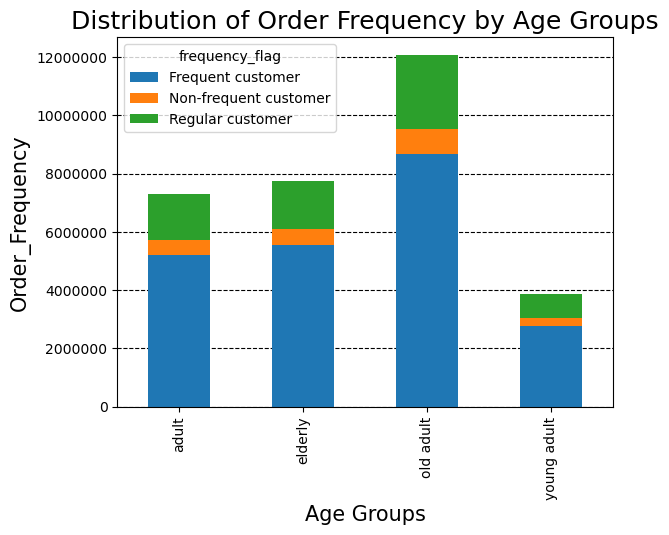

In [469]:
# Create a stacked bar chart for the distribution of age groups by order_frequency

# Creating the horizontal, stacked bar chart for the comparison between age groups and order_frequency
fig17, ax17 = plt.subplots()

# Plotting the horizontal stacked bar plot
bar6 = age_frequency_comparison.plot.bar(stacked=True, ax=ax17)

# Overlay a grid behind the bars
ax17.set_axisbelow(True)  # Ensure grid is behind bars
ax17.grid(axis='y', color='black', linestyle='dashed')

# General formatting for labels, title
ax17.set_title('Distribution of Order Frequency by Age Groups', fontsize=18)
ax17.set_ylabel('Order_Frequency', fontsize=15)
ax17.set_xlabel('Age Groups', fontsize=15)

ax17.ticklabel_format(style='plain', axis='y')

plt.show()

In [471]:
# Export the visualization

fig17.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'age_frequency_comparison.png'), bbox_inches='tight')

#### 5.4.2 Compare the Age Group and Income

In [151]:
age_income_comparison = pd.crosstab(df_comparison['age_profile'], df_comparison['income_range'],dropna = False)

In [152]:
age_income_comparison

income_range,low income,middle income,upper income
age_profile,,,
adult,1119794,3882477,2281644
elderly,637365,674962,6418507
old adult,1006126,1037818,10041353
young adult,599269,2034109,1231140


In [619]:
# Putting it on the clipboard for the final report

age_income_comparison.to_clipboard()

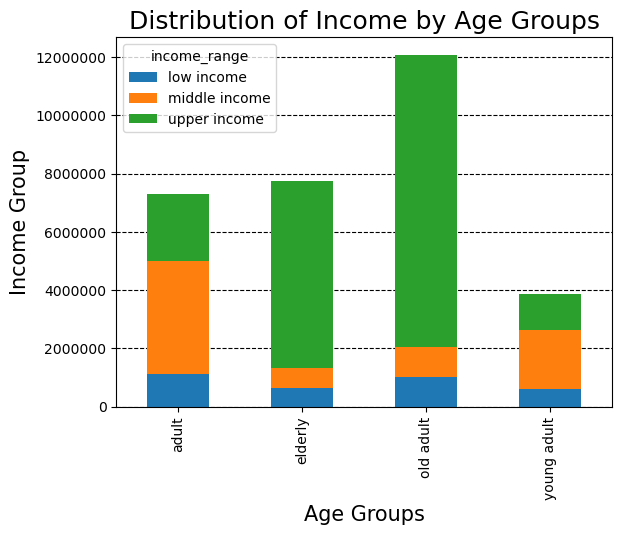

In [465]:
# Create a stacked bar chart for the distribution of age groups and income

# Creating the horizontal, stacked bar chart for the comparison between age groups and income
fig18, ax18 = plt.subplots()

# Plotting the horizontal stacked bar plot
bar7 = age_income_comparison.plot.bar(stacked=True, ax=ax18)

# Overlay a grid behind the bars
ax18.set_axisbelow(True)  # Ensure grid is behind bars
ax18.grid(axis='y', color='black', linestyle='dashed')

# General formatting for labels, title
ax18.set_title('Distribution of Income by Age Groups', fontsize=18)
ax18.set_ylabel('Income Group', fontsize=15)
ax18.set_xlabel('Age Groups', fontsize=15)

ax18.ticklabel_format(style='plain', axis='y')

plt.show()

In [467]:
# Export the visualization

fig18.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'age_income_comparison.png'), bbox_inches='tight')

#### 5.4.3 Compare the Age Group and Family Status

In [156]:
age_fam_status_comparison = pd.crosstab(df_comparison['age_profile'], df_comparison['fam_status'],dropna = False)

In [157]:
age_fam_status_comparison

fam_status,divorced/widowed,living with parents and siblings,married,single
age_profile,,,,
adult,0,0,5456883,1827032
elderly,1905721,0,5825113,0
old adult,739550,0,9031596,2314151
young adult,0,1481172,1430119,953227


In [621]:
# Putting it on the clipboard for the final report

age_fam_status_comparison.to_clipboard()

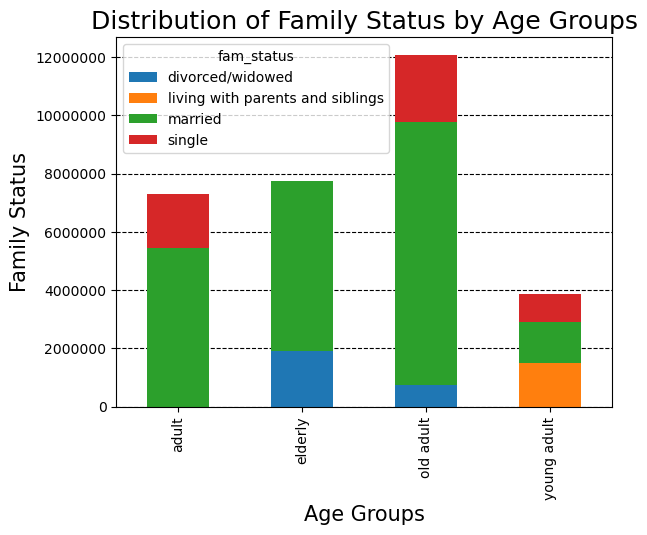

In [461]:
# Create a stacked bar chart for the distribution of age groups and family status

# Creating the horizontal, stacked bar chart for the comparison between age groups and family status
fig19, ax19 = plt.subplots()

# Plotting the horizontal stacked bar plot
bar7 = age_fam_status_comparison.plot.bar(stacked=True, ax=ax19)

# Overlay a grid behind the bars
ax19.set_axisbelow(True)  # Ensure grid is behind bars
ax19.grid(axis='y', color='black', linestyle='dashed')

# General formatting for labels, title
ax19.set_title('Distribution of Family Status by Age Groups', fontsize=18)
ax19.set_ylabel('Family Status', fontsize=15)
ax19.set_xlabel('Age Groups', fontsize=15)

ax19.ticklabel_format(style='plain', axis='y')

plt.show()

In [463]:
# Export the visualization

fig19.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'age_fam_status_comparison.png'), bbox_inches='tight')

#### 5.4.4 Compare the Age Group and Household

In [161]:
age_household_comparison = pd.crosstab(df_comparison['age_profile'], df_comparison['household'],dropna = False)

In [162]:
age_household_comparison

household,big household,middle household,single household
age_profile,,,
adult,1813284,3643599,1827032
elderly,1941778,3883335,1905721
old adult,3039991,5991605,3053701
young adult,977463,1933828,953227


In [623]:
# Putting it on the clipboard for the final report

age_household_comparison.to_clipboard()

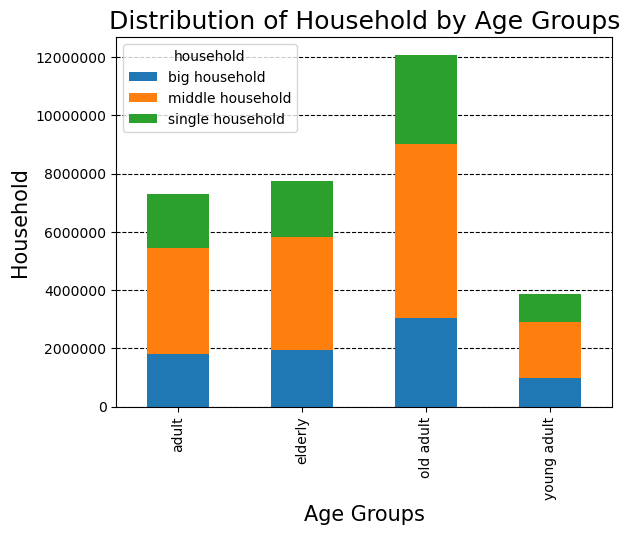

In [457]:
# Create a stacked bar chart for the distribution of age groups and household

# Creating the horizontal, stacked bar chart for the comparison between age groups and household
fig20, ax20 = plt.subplots()

# Plotting the horizontal stacked bar plot
bar7 = age_household_comparison.plot.bar(stacked=True, ax=ax20)

# Overlay a grid behind the bars
ax20.set_axisbelow(True)  # Ensure grid is behind bars
ax20.grid(axis='y', color='black', linestyle='dashed')

# General formatting for labels, title
ax20.set_title('Distribution of Household by Age Groups', fontsize=18)
ax20.set_ylabel('Household', fontsize=15)
ax20.set_xlabel('Age Groups', fontsize=15)

ax20.ticklabel_format(style='plain', axis='y')

plt.show()

In [459]:
# Export the visualization

fig20.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'age_household_comparison.png'), bbox_inches='tight')

### 5.5 Comparison by Income

#### 5.5.1 Compare the Income and Spending

In [167]:
income_spending_comparison = pd.crosstab(df_comparison['income_range'], df_comparison['spending_flag'],dropna = False)

In [168]:
income_spending_comparison

spending_flag,High spender,Low spender
income_range,,
low income,2026,3360528
middle income,31025,7598341
upper income,570374,19402270


In [625]:
# Putting it on the clipboard for the final report

income_spending_comparison.to_clipboard()

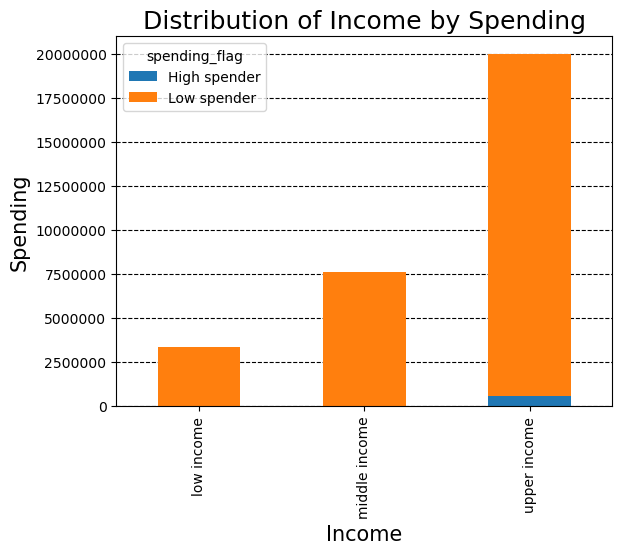

In [549]:
# Create a stacked bar chart for the distribution of income by spending in percentage

# Creating the horizontal, stacked bar chart for the comparison between income and spending
fig23, ax23 = plt.subplots()

# Plotting the horizontal stacked bar plot
bar11 = income_spending_comparison.plot.bar(stacked=True, ax=ax23)

# Overlay a grid behind the bars
ax23.set_axisbelow(True)  # Ensure grid is behind bars
ax23.grid(axis='y', color='black', linestyle='dashed')

# General formatting for labels, title
ax23.set_title('Distribution of Income by Spending', fontsize=18)
ax23.set_ylabel('Spending', fontsize=15)
ax23.set_xlabel('Income', fontsize=15)

ax23.ticklabel_format(style='plain', axis='y')

plt.show()

In [ ]:
# Export the visualization

fig23.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'income_spending_comparison.png'), bbox_inches='tight')

In [569]:
# Calculating the percentage for better recommendations in the last project step

income_spending_comparison_percentage = income_spending_comparison.div(income_spending_comparison.sum(axis=1), axis=0) * 100

In [561]:
income_spending_comparison_percentage

spending_flag,High spender,Low spender
income_range,,
low income,0.060252,99.939748
middle income,0.406652,99.593348
upper income,2.855776,97.144224


In [627]:
# Putting it on the clipboard for the final report

income_spending_comparison_percentage.to_clipboard()

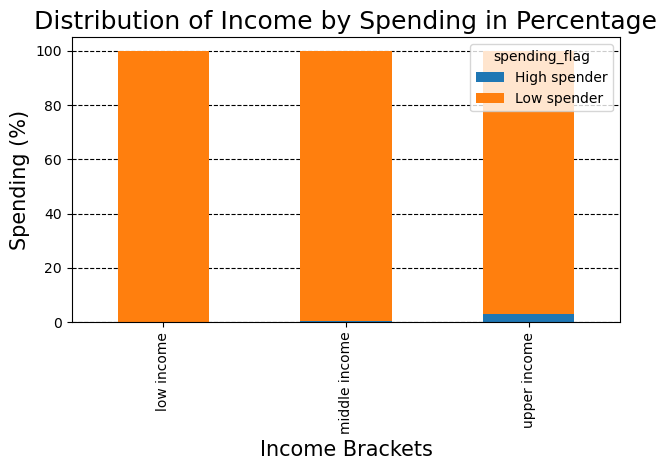

In [563]:
# Creating the horizontal, stacked bar chart for the comparison between income and spending
fig44, ax44 = plt.subplots()

# Plotting the horizontal stacked bar plot
income_spending_comparison_percentage.plot(kind='bar', stacked=True, ax=ax44)

# Overlay a grid behind the bars
ax44.set_axisbelow(True)  # Ensure grid is behind bars
ax44.grid(axis='y', color='black', linestyle='dashed')

# General formatting for labels, title
ax44.set_title('Distribution of Income by Spending in Percentage', fontsize=18)
ax44.set_ylabel('Spending (%)', fontsize=15)
ax44.set_xlabel('Income Brackets', fontsize=15)

ax44.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

In [565]:
# Export the visualization

fig44.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'income_spending_comparison_ratio.png'), bbox_inches='tight')

#### 5.5.3 Compare the Income and Household

In [172]:
income_household_comparison = pd.crosstab(df_comparison['income_range'], df_comparison['household'],dropna = False)

In [173]:
income_household_comparison

household,big household,middle household,single household
income_range,,,
low income,839173,1676461,846920
middle income,1933617,3804163,1891586
upper income,4999726,9971743,5001175


In [629]:
# Putting it on the clipboard for the final report

income_household_comparison.to_clipboard()

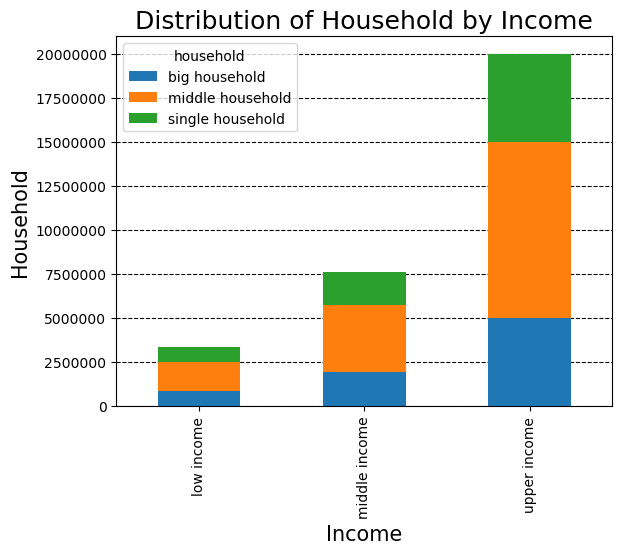

In [449]:
# Create a stacked bar chart for the distribution of the income by household

# Creating the horizontal, stacked bar chart for the comparison between income and household
fig24, ax24 = plt.subplots()

# Plotting the horizontal stacked bar plot
bar12 = income_household_comparison.plot.bar(stacked=True, ax=ax24)

# Overlay a grid behind the bars
ax24.set_axisbelow(True)  # Ensure grid is behind bars
ax24.grid(axis='y', color='black', linestyle='dashed')

# General formatting for labels, title
ax24.set_title('Distribution of Household by Income', fontsize=18)
ax24.set_ylabel('Household', fontsize=15)
ax24.set_xlabel('Income', fontsize=15)

ax24.ticklabel_format(style='plain', axis='y')

plt.show()

In [451]:
# Export the visualization

fig24.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'income_household_comparison.png'), bbox_inches='tight')

#### 5.5.3 Compare the Income and Family Status

In [177]:
income_fam_status_comparison = pd.crosstab(df_comparison['income_range'], df_comparison['fam_status'],dropna = False)

In [178]:
income_fam_status_comparison

fam_status,divorced/widowed,living with parents and siblings,married,single
income_range,,,,
low income,210710,220542,2295092,636210
middle income,228166,789966,4947814,1663420
upper income,2206395,470664,14500805,2794780


In [631]:
# Putting it on the clipboard for the final report

income_fam_status_comparison.to_clipboard()

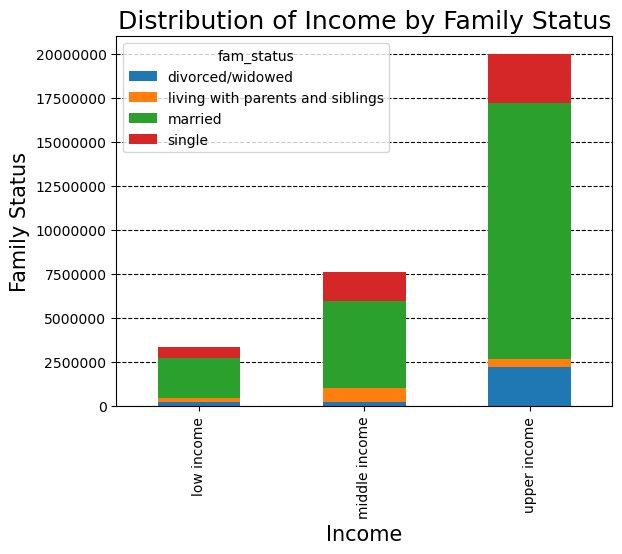

In [445]:
# Create a stacked bar chart for the distribution of Income by Family Status

# Creating the horizontal, stacked bar chart for the comparison between family_status and income
fig26, ax26 = plt.subplots()

# Plotting the horizontal stacked bar plot
bar14 = income_fam_status_comparison.plot.bar(stacked=True, ax=ax26)

# Overlay a grid behind the bars
ax26.set_axisbelow(True)  # Ensure grid is behind bars
ax26.grid(axis='y', color='black', linestyle='dashed')

# General formatting for labels, title
ax26.set_title('Distribution of Income by Family Status', fontsize=18)
ax26.set_ylabel('Family Status', fontsize=15)
ax26.set_xlabel('Income', fontsize=15)

ax26.ticklabel_format(style='plain', axis='y')

plt.show()

In [447]:
# Export the visualization

fig26.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'income_fam_status_comparison.png'), bbox_inches='tight')

#### 5.5.4 Compare the Income and Frequency

In [317]:
income_frequency_comparison = pd.crosstab(df_comparison['income_range'], df_comparison['frequency_flag'],dropna = False)

In [319]:
income_frequency_comparison

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_range,,,
low income,2312595,291060,758899
middle income,5508679,536351,1584336
upper income,14387620,1360006,4225018


In [633]:
# Putting it on the clipboard for the final report

income_frequency_comparison.to_clipboard()

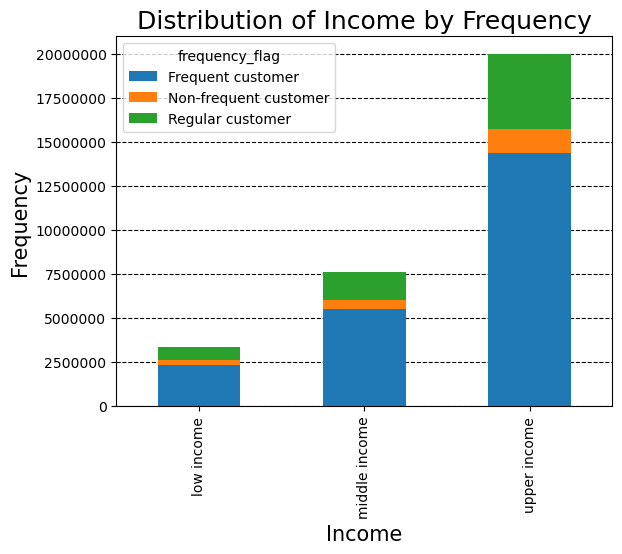

In [441]:
# Create a stacked bar chart for the distribution of Income by Frequency

# Creating the horizontal, stacked bar chart for the comparison between frequency and income
fig27, ax27 = plt.subplots()

# Plotting the horizontal stacked bar plot
bar14 = income_frequency_comparison.plot.bar(stacked=True, ax=ax27)

# Overlay a grid behind the bars
ax27.set_axisbelow(True)  # Ensure grid is behind bars
ax27.grid(axis='y', color='black', linestyle='dashed')

# General formatting for labels, title
ax27.set_title('Distribution of Income by Frequency', fontsize=18)
ax27.set_ylabel('Frequency', fontsize=15)
ax27.set_xlabel('Income', fontsize=15)

ax27.ticklabel_format(style='plain', axis='y')

plt.show()

In [443]:
# Export the visualization

fig27.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'income_frequency_comparison.png'), bbox_inches='tight')

## 6. Additional Insights

### 6.1 Departments

#### 6.1.1 Top 10 Departments in Percentage

In [184]:
# Rename the data frame to avoid confusion

df_final_version = df_comparison

In [185]:
# Calculate the Top 10 departments

top_10_departments = df_final_version['department'].value_counts().head(10)

In [367]:
department_percentages

department
dry goods pasta     2.994151
deli                3.655880
canned goods        3.685889
bakery              4.081962
pantry              6.492463
frozen              7.727167
beverages           9.366649
snacks             10.075020
dairy eggs         18.854865
produce            33.065955
Name: count, dtype: float64

In [186]:
top_10_departments

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
Name: count, dtype: int64

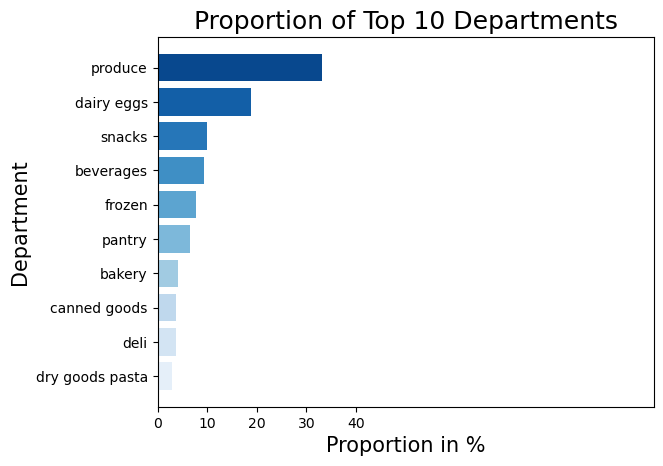

In [187]:
# Top 10 departments in ascending order
department_counts = top_10_departments.sort_values(ascending=True)

# Convert to proportions
department_proportions = department_counts / department_counts.sum()

# Convert proportions to percentages
department_percentages = department_proportions * 100

# Create color palette
colors = sns.color_palette("Blues", n_colors=len(department_percentages))

fig27, ax27 = plt.subplots()
bar_width = 0.6

# Plotting the bar chart with percentages
ax27.barh(department_percentages.index, department_percentages.values, color=colors)

# Formatting the chart
ax27.set_xlabel('Proportion in %', fontsize=15)
ax27.set_ylabel('Department', fontsize=15)
ax27.set_title('Proportion of Top 10 Departments', fontsize=18)

# Set the x-ticks to whole numbers
ax27.set_xticks(np.arange(0, 101, 10))  # Adjust the range based on your data
ax27.set_xticks(np.arange(0, max(department_percentages.values) + 10, 10))  # Custom range based on max value

# Show plot
plt.show()

In [188]:
# Export the visualization

fig27.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'Proportion_10_dep.png'), bbox_inches='tight')

#### 6.1.2 Top 10 Departments by Sales(count)

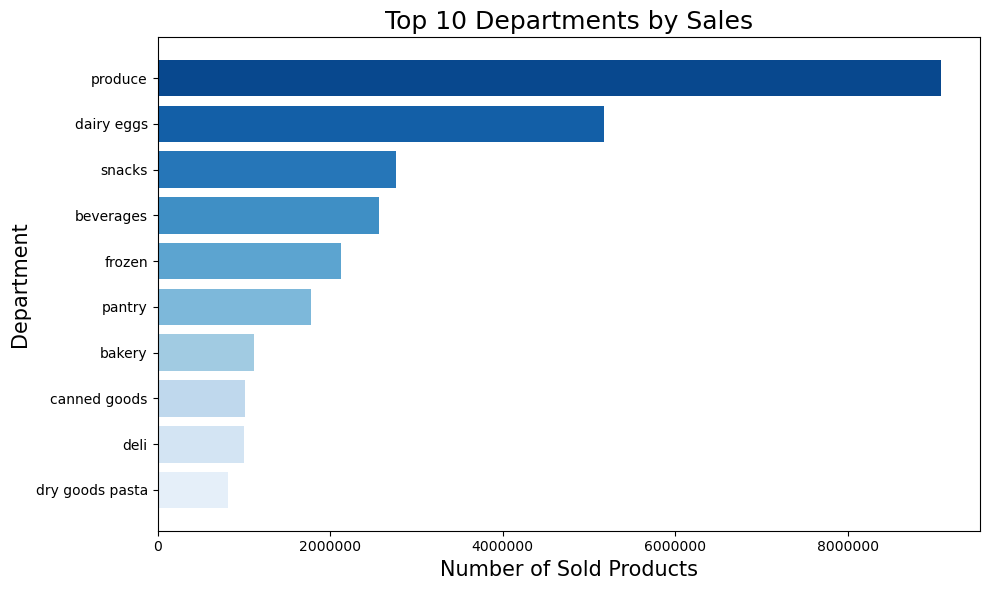

In [190]:
# Top 10 departments in ascending order
department_counts = top_10_departments.sort_values(ascending=True)

# Create color palette
colors = sns.color_palette("Blues", n_colors=len(department_counts))

fig28, ax28 = plt.subplots(figsize=(10, 6))

bar_width = 0.6

# Plotting the bar chart with counts
ax28.barh(department_counts.index, department_counts.values, color=colors)

# Formatting the chart
ax28.set_xlabel('Number of Sold Products', fontsize=15)
ax28.set_ylabel('Department', fontsize=15)
ax28.set_title('Top 10 Departments by Sales', fontsize=18)

# Adjust range of the x_axis to display whole numbers
max_value = department_counts.values.max()
ax28.set_xticks(np.arange(0, max_value + 1, 2000000)) 

# Format x-axis ticks to show whole numbers
ax28.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

# Show plot
plt.tight_layout()
plt.show()

In [191]:
# Export the visualization

fig28.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'Top_10_dep.png'), bbox_inches='tight')

### 6.2 Analyzing Customer Behaviour

#### 6.2.1 Creating Hour Groups

In [194]:
# Create a new list of hour groups

hour_result = []

for hour in df_final_version["order_hour_of_day"]:
    if 5 <= hour <= 11:
        hour_result.append("Morning")
    elif 12 <= hour <= 16:
        hour_result.append("Afternoon")
    elif 17 <= hour <= 20:
        hour_result.append("Evening")
    else:
        hour_result.append("Night")

# Add the result to a new column to the dataframe
df_comparison['hour_group'] = hour_result

In [195]:
# Convert 'hour_group' to a categorical type with the specified order
hour_order = ['Morning', 'Afternoon', 'Evening', 'Night']
df_final_version['hour_group'] = pd.Categorical(df_final_version['hour_group'], categories=hour_order, ordered=True)

# Group by 'hour_group' and count the number of 'order_id's
order_hour_counts = df_final_version.groupby('hour_group')['order_id'].count().reset_index()

/var/folders/y8/whbdk63x63398jrksgc7pp0r0000gn/T/ipykernel_11130/961592139.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_hour_counts = df_final_version.groupby('hour_group')['order_id'].count().reset_index()


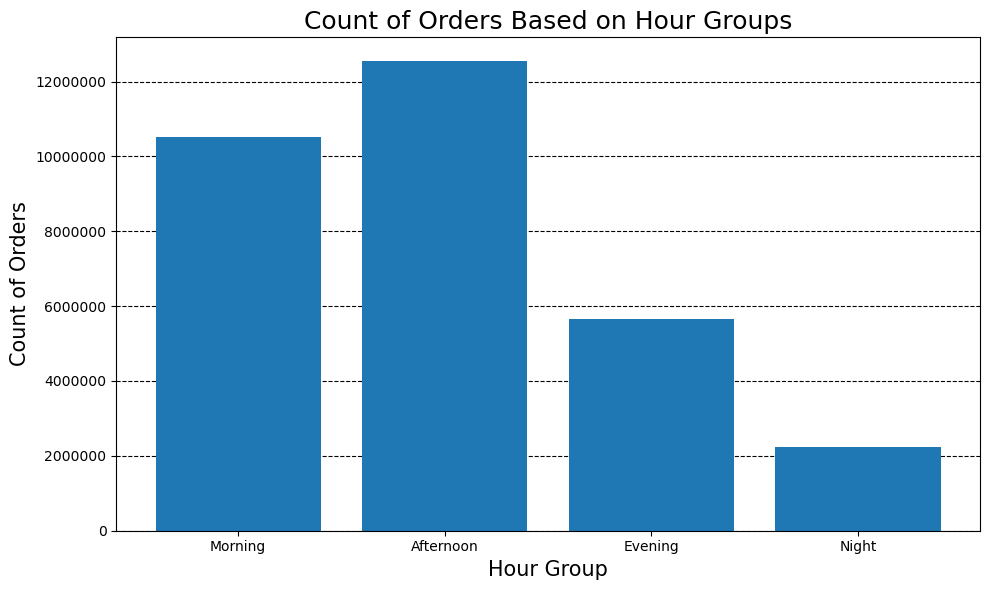

In [437]:
# Create a bar chart

fig29, ax29 = plt.subplots(figsize=(10,6))

# Creating the bar chart
ax29.bar(order_hour_counts['hour_group'], order_hour_counts['order_id'])

# Setting grid, labels, and title
ax29.set_axisbelow(True)
ax29.grid(axis='y', color='black', linestyle='dashed')

# Using ax12 for the labels and title
ax29.set_xlabel('Hour Group', fontsize=15)
ax29.set_ylabel('Count of Orders', fontsize=15)
ax29.set_title('Count of Orders Based on Hour Groups', fontsize=18)

ax29.ticklabel_format(style='plain', axis='y')

ax29.grid(axis='y', color='black', linestyle='dashed')
                
plt.tight_layout()
plt.show()

In [439]:
# Export the visualization

fig29.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'Count_Order_Hour_Group.png'), bbox_inches='tight')

#### 6.2.2 Analyze the order habits based on loyalty status

#### 6.2.2.1 Total order price and loyalty status

In [200]:
# Calculate the average order_total

loyalty_order_total = df_customer_profile.groupby('loyalty_flag')['total_order_price'].mean().sort_values(ascending = False).reset_index()

In [201]:
loyalty_order_totallmost t

,loyalty_flag,total_order_price
0,Regular customer,77.493455
1,New customer,73.627075
2,Loyal customer,68.667095


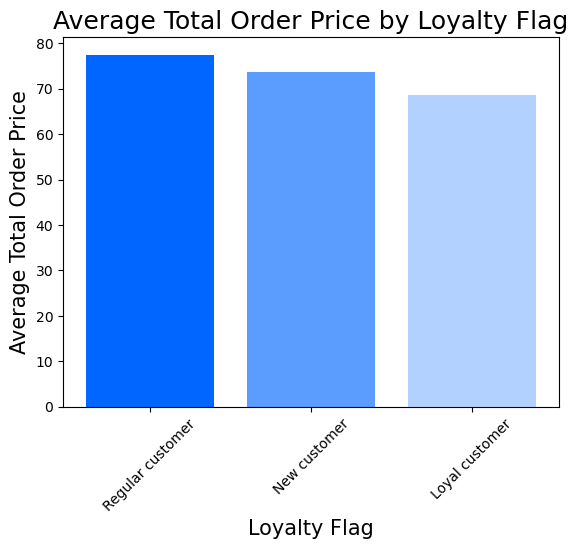

In [202]:
# Create a bar chart to show the average total_order_price by loyalty_flag
cmap = LinearSegmentedColormap.from_list("custom_blue", ["#0066ff", "#b3d1ff"], N=256)

fig30, ax30 = plt.subplots()

# Plotting the average total_order_price with loyalty_flag on the x-axis
ax30.bar(loyalty_order_total['loyalty_flag'], loyalty_order_total['total_order_price'], color=cmap(np.linspace(0, 1, len(loyalty_order_total))))

# Setting labels and title
ax30.set_xlabel('Loyalty Flag', fontsize=15)
ax30.set_ylabel('Average Total Order Price', fontsize=15)
ax30.set_title('Average Total Order Price by Loyalty Flag', fontsize=18)

plt.xticks(rotation=45)
plt.show()

In [203]:
# Export the visualization

fig30.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'order_loyalty'), bbox_inches='tight')

#### 6.2.2.2 Price range and loyalty status

In [205]:
# Group price range by loyalty_flag

loyalty_price_range = Instacart_final_version.groupby(['loyalty_flag', 'price_range_loc']).size().unstack(fill_value=0)

In [206]:
loyalty_price_range

price_range_loc,High range product,Low range product,Mid range product
loyalty_flag,,,
Loyal customer,119936,3214690,6949467
New customer,65927,1501288,3236480
Regular customer,212090,4958862,10705824


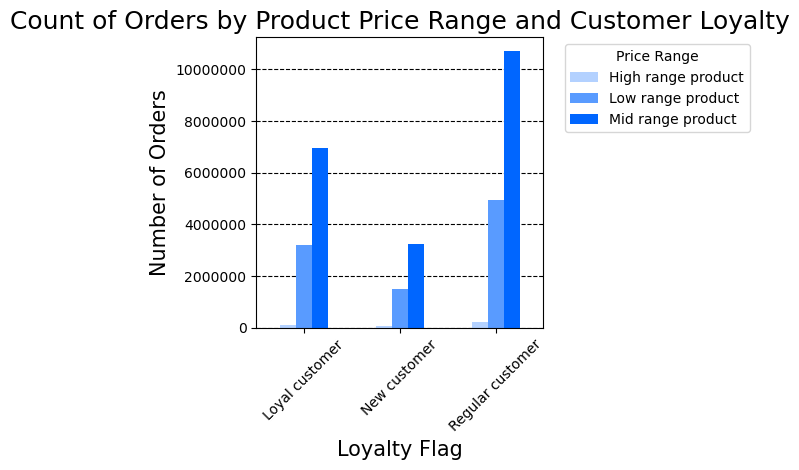

In [433]:
# Create a bar chart to show the average product_price_range by loyalty_flag

cmap = LinearSegmentedColormap.from_list("custom_blue", ["#b3d1ff", "#0066ff"], N=256)

fig31, ax31 = plt.subplots()

# Convert the cmap to a list of colors
colors = cmap(np.linspace(0, 1, loyalty_price_range.shape[1])).tolist()

# Creating the grouped bar plot
loyalty_price_range.plot(kind='bar', stacked=False, color=colors, ax=ax31)

# Setting grid, labels, and title
ax31.set_axisbelow(True)
ax31.grid(axis='y', color='black', linestyle='dashed')

# Using ax31 for the labels and title
ax31.set_xlabel('Loyalty Flag', fontsize=15)
ax31.set_ylabel('Number of Orders', fontsize=15)
ax31.set_title('Count of Orders by Product Price Range and Customer Loyalty', fontsize=18)

ax31.ticklabel_format(style='plain', axis='y')

plt.xticks(rotation=45)
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.show()

In [435]:
# Export the visualization

fig31.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'product_range_loyalty.png'), bbox_inches='tight')

#### 6.2.2.3 time and loyalty status

In [210]:
# Create a crosstab for hour_group and loyalty_flag

hour_loyalty_behaviour = pd.crosstab(df_final_version['hour_group'], df_final_version['loyalty_flag'],dropna = False)

In [211]:
hour_loyalty_behaviour

loyalty_flag,Loyal customer,New customer,Regular customer
hour_group,,,
Morning,3826237,1454906,5234846
Afternoon,4020166,2032422,6500033
Evening,1703500,966235,2988581
Night,734190,350132,1153316


In [635]:
# Putting it on the clipboard for the final report

hour_loyalty_behaviour.to_clipboard()

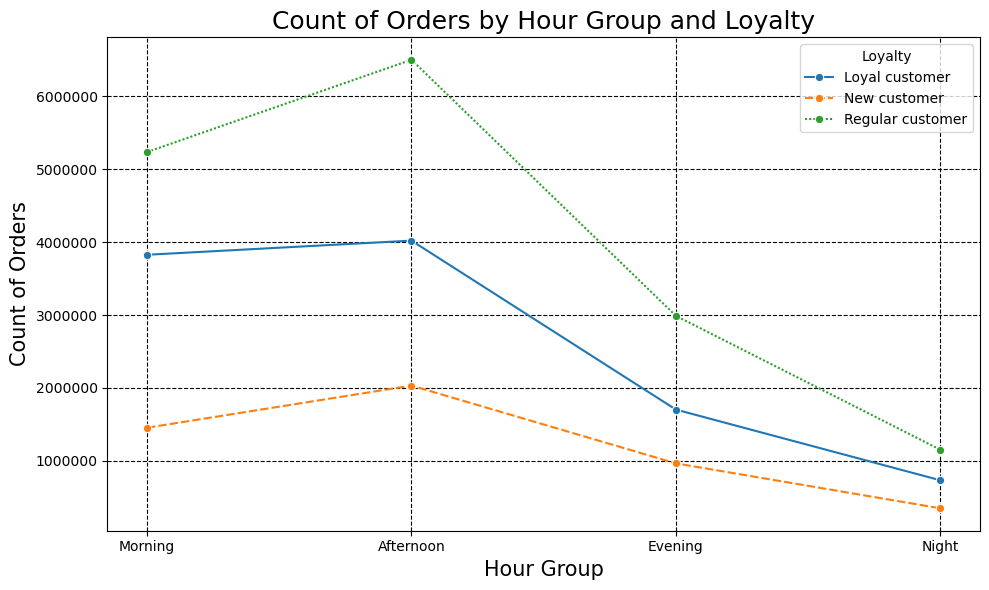

In [429]:
# Sort the index to ensure the x-axis flows in the logical order of the day
hour_loyalty_behaviour = hour_loyalty_behaviour.reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

# Plot the crosstab as a line chart

fig32, ax32 = plt.subplots(figsize=(10,6))
line = sns.lineplot(data = hour_loyalty_behaviour, ax=ax32, marker='o')
                    
# Set labels and titles
ax32.set_xlabel('Hour Group', fontsize=15)
ax32.set_ylabel('Count of Orders', fontsize=15)
ax32.set_title('Count of Orders by Hour Group and Loyalty', fontsize=18)
ax32.ticklabel_format(style='plain', axis='y')

ax32.legend(title='Loyalty')
ax32.grid(axis='both', color='black', linestyle='dashed')

plt.tight_layout()
plt.show()

In [431]:
# Export the visualization

fig32.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'Count_Order_Hour_loyalty.png'), bbox_inches='tight')

#### 6.2.3 Analyze the order habits based on region

#### 6.2.3.1 Total order price and region

In [216]:
# Calculate the average order_total

loyalaty_region_total = df_customer_profile.groupby('region')['total_order_price'].mean().sort_values(ascending = False).reset_index()

In [217]:
loyalaty_region_total

,region,total_order_price
0,South,76.336579
1,Midwest,76.310941
2,Northeast,75.977252
3,West,75.928960


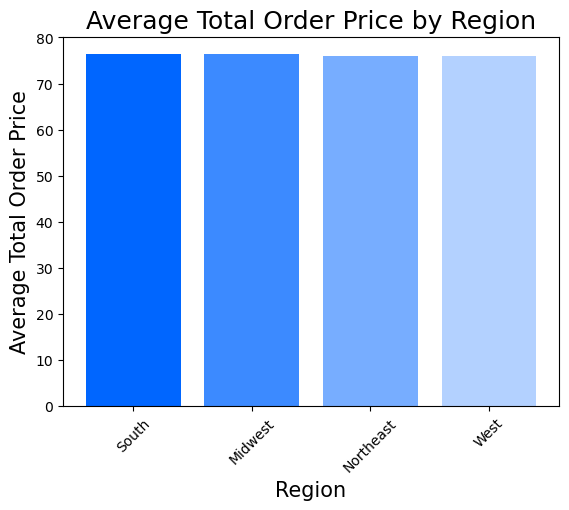

In [218]:
# Create a bar chart to show the average total_order_price by loyalty_flag
cmap = LinearSegmentedColormap.from_list("custom_blue", ["#0066ff", "#b3d1ff"], N=256)

fig33, ax33 = plt.subplots()

# Plotting the average total_order_price with loyalty_flag on the x-axis
ax33.bar(loyalaty_region_total['region'], loyalaty_region_total['total_order_price'], color=cmap(np.linspace(0, 1, len(loyalaty_region_total))))

# Setting labels and title
ax33.set_xlabel('Region', fontsize=15)
ax33.set_ylabel('Average Total Order Price', fontsize=15)
ax33.set_title('Average Total Order Price by Region', fontsize=18)

plt.xticks(rotation=45)
plt.show()

In [219]:
# Export the visualization

fig33.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'region_loyalty'), bbox_inches='tight')

#### 6.2.3.2 Product range and region

In [221]:
# Group price range by region

region_price_range = Instacart_final_version.groupby(['region', 'price_range_loc']).size().unstack(fill_value=0)

In [222]:
region_price_range

price_range_loc,High range product,Low range product,Mid range product
region,,,
Midwest,93280,2267085,4901148
Northeast,69732,1712360,3682593
South,132661,3217500,6960978
West,102280,2477895,5347052


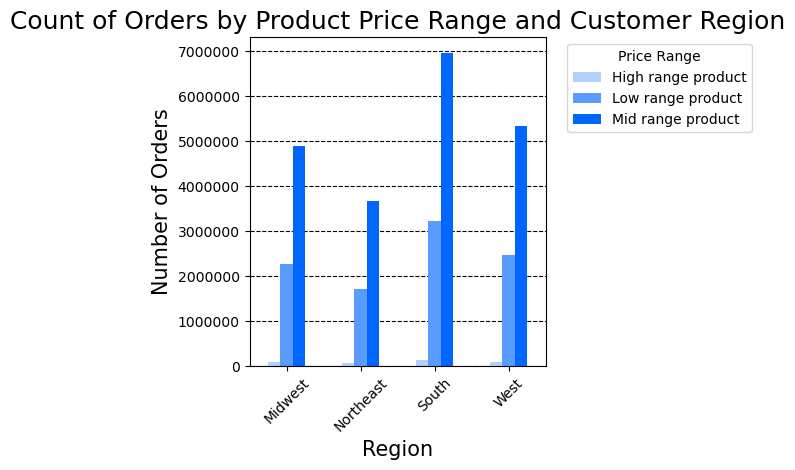

In [425]:
# Create a bar chart to show the product_price_range by region

cmap = LinearSegmentedColormap.from_list("custom_blue", ["#b3d1ff", "#0066ff"], N=256)

fig34, ax34 = plt.subplots()

# Convert the cmap to a list of colors
colors = cmap(np.linspace(0, 1, region_price_range.shape[1])).tolist()

# Creating the grouped bar plot
region_price_range.plot(kind='bar', stacked=False, color=colors, ax=ax34)

# Setting grid, labels, and title
ax34.set_axisbelow(True)
ax34.grid(axis='y', color='black', linestyle='dashed')

# Using ax31 for the labels and title
ax34.set_xlabel('Region', fontsize=15)
ax34.set_ylabel('Number of Orders', fontsize=15)
ax34.set_title('Count of Orders by Product Price Range and Customer Region', fontsize=18)

ax34.ticklabel_format(style='plain', axis='y')

plt.xticks(rotation=45)
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.show()

In [427]:
# Export the visualization

fig34.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'product_range_region.png'), bbox_inches='tight')

#### 6.2.3.3 Time and region

In [226]:
# Create a crosstab for hour_group and region

hour_region_behaviour = pd.crosstab(df_final_version['hour_group'], df_final_version['region'],dropna = False)

In [227]:
hour_region_behaviour

region,Midwest,Northeast,South,West
hour_group,,,,
Morning,2458947,1851673,3518451,2686918
Afternoon,2936875,2219998,4161531,3234217
Evening,1338147,990994,1885658,1443517
Night,527544,402020,745499,562575


In [637]:
# Putting it on the clipboard for the final report

hour_region_behaviour.to_clipboard()

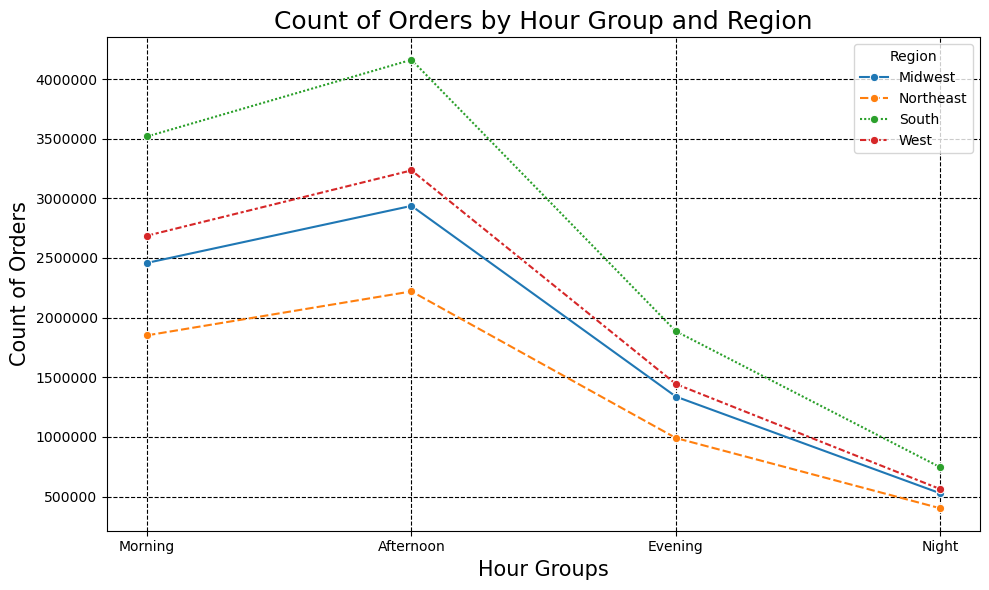

In [421]:
# Plot the crosstab as a line chart

fig35, ax35 = plt.subplots(figsize=(10,6))
line = sns.lineplot(data = hour_region_behaviour, ax=ax35, marker='o')
                    
# Set labels and titles
ax35.set_xlabel('Hour Groups', fontsize=15)
ax35.set_ylabel('Count of Orders', fontsize=15)
ax35.set_title('Count of Orders by Hour Group and Region', fontsize=18)
ax35.legend(title='Region')
ax35.grid(axis='both', color='black', linestyle='dashed')

ax35.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

In [423]:
# Export the visualization

fig35.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'Count_Order_Hour_Region.png'), bbox_inches='tight')

#### 6.2.4 Analyze the order habits based on the connection of age and family status

#### 6.2.4.1 Total order and family status and age

In [232]:
# Create a data frame grouping family status and age groups by total_order_price(avg.)

order_total_age_fam = df_customer_profile.groupby(['fam_status', 'age_profile'])['total_order_price'].mean().unstack(fill_value=0)

In [233]:
order_total_age_fam

age_profile,adult,elderly,old adult,young adult
fam_status,,,,
divorced/widowed,0.000000,76.369742,77.208121,0.000000
living with parents and siblings,0.000000,0.000000,0.000000,77.318050
married,76.361052,75.974746,76.197859,75.522252
single,75.420759,0.000000,75.953042,75.859824


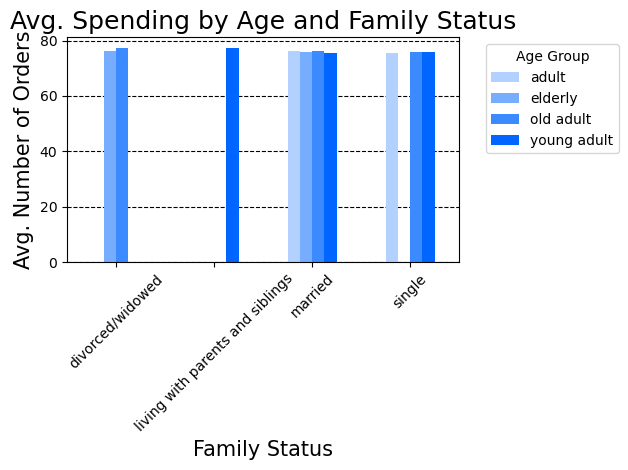

In [417]:
# Create a bar chart to show avg. spending by age and family status

cmap = LinearSegmentedColormap.from_list("custom_blue", ["#b3d1ff", "#0066ff"], N=256)

fig36, ax36 = plt.subplots()

# Convert the cmap to a list of colors
colors = cmap(np.linspace(0, 1, order_total_age_fam.shape[1])).tolist()

# Creating the grouped bar plot
order_total_age_fam.plot(kind='bar', stacked=False, color=colors, ax=ax36)

# Setting grid, labels, and title
ax36.set_axisbelow(True)
ax36.grid(axis='y', color='black', linestyle='dashed')

# Using ax31 for the labels and title
ax36.set_xlabel('Family Status', fontsize=15)
ax36.set_ylabel('Avg. Number of Orders', fontsize=15)
ax36.set_title('Avg. Spending by Age and Family Status', fontsize=18)
ax36.ticklabel_format(style='plain', axis='y')

plt.xticks(rotation=45)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.show()

In [419]:
# Export the visualization

fig36.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'order_fam_age.png'), bbox_inches='tight')

#### 6.2.4.2 Days since last order and family status and age

In [237]:
# Create a data frame grouping family status and age groups by days_since_last_order(avg.)

last_order_age_fam = df_customer_profile.groupby(['fam_status', 'age_profile'])['days_since_last_order'].mean().unstack(fill_value=0)

In [238]:
last_order_age_fam

age_profile,adult,elderly,old adult,young adult
fam_status,,,,
divorced/widowed,0.000000,15.347692,15.347132,0.000000
living with parents and siblings,0.000000,0.000000,0.000000,15.452208
married,15.381592,15.446472,15.442788,15.358366
single,15.354519,0.000000,15.429350,15.431016


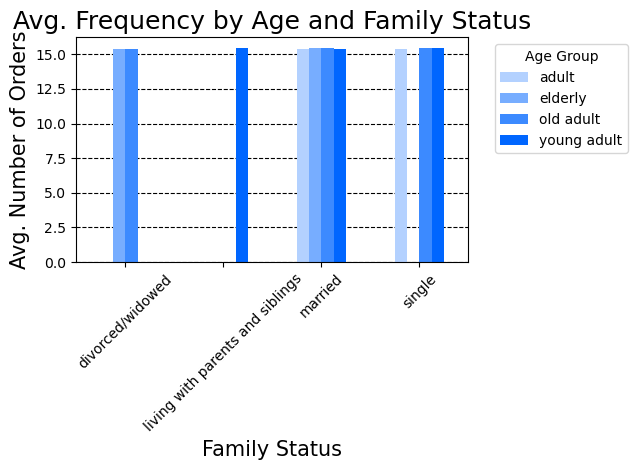

In [411]:
# Create a bar chart to show avg. days since the last order by age and family status

cmap = LinearSegmentedColormap.from_list("custom_blue", ["#b3d1ff", "#0066ff"], N=256)

fig37, ax37 = plt.subplots()

# Convert the cmap to a list of colors
colors = cmap(np.linspace(0, 1, last_order_age_fam.shape[1])).tolist()

# Creating the grouped bar plot
last_order_age_fam.plot(kind='bar', stacked=False, color=colors, ax=ax37)

# Setting grid, labels, and title
ax37.set_axisbelow(True)
ax37.grid(axis='y', color='black', linestyle='dashed')

# Using ax31 for the labels and title
ax37.set_xlabel('Family Status', fontsize=15)
ax37.set_ylabel('Avg. Number of Orders', fontsize=15)
ax37.set_title('Avg. Frequency by Age and Family Status', fontsize=18)

ax37.ticklabel_format(style='plain', axis='y')

plt.xticks(rotation=45)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.show()

In [415]:
# Export the visualization

fig37.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'frequency_fam_age.png'), bbox_inches='tight')

#### 6.2.5 Analyze the order habits of different customer profiles based on frequency, price, and products

#### 6.2.5.1 Analyze the order habits based on frequency

In [243]:
# Create a suitable customer profile

df_customer_profile_frequency = df_customer_profile.groupby(['fam_status', 'household', 'age_profile', 'frequency_flag']).size().unstack(fill_value=0)

In [244]:
df_customer_profile_frequency

frequency_flag                                                 Frequent customer  \
fam_status                       household        age_profile                      
divorced/widowed                 single household elderly                   8322   
                                                  old adult                 3123   
living with parents and siblings big household    young adult               1989   
                                 middle household young adult               4001   
married                          big household    adult                     7523   
                                                  elderly                   7462   
                                                  old adult                12788   
                                                  young adult               1721   
                                 middle household adult                    14164   
                                                  elderly                  15242   
                                                  old adult                24227   
                                                  young adult               3825   
single                           single household adult                     7791   
                                                  old adult                 9312   
                                                  young adult               4123   

frequency_flag                                                 Non-frequent customer  \
fam_status                       household        age_profile                          
divorced/widowed                 single household elderly                      14328   
                                                  old adult                     5367   
living with parents and siblings big household    young adult                   3770   
                                 middle household young adult                   7495   
married                          big household    adult                        13536   
                                                  elderly                      14517   
                                                  old adult                    23403   
                                                  young adult                   3446   
                                 middle household adult                        27646   
                                                  elderly                      29084   
                                                  old adult                    45755   
                                                  young adult                   7058   
single                           single household adult                        13784   
                                                  old adult                    17472   
                                                  young adult                   7393   

frequency_flag                                                 Regular customer  
fam_status                       household        age_profile                    
divorced/widowed                 single household elderly                 40771  
                                                  old adult               15547  
living with parents and siblings big household    young adult              9387  
                                 middle household young adult             20217  
married                          big household    adult                   39013  
                                                  elderly                 41954  
                                                  old adult               66202  
                                                  young adult             10492  
                                 middle household adult                   79026  
                                                  elderly                 82873  
                                                  old adult              128290  
        

In [245]:
# Change the layout of the data frame from long to a wide format for cleaner output

df_customer_profile_frequency_wide = df_customer_profile_frequency.T

In [246]:
df_customer_profile_frequency_wide

fam_status            divorced/widowed            \
household             single household             
age_profile                    elderly old adult   
frequency_flag                                     
Frequent customer                 8322      3123   
Non-frequent customer            14328      5367   
Regular customer                 40771     15547   

fam_status            living with parents and siblings                   \
household                                big household middle household   
age_profile                                young adult      young adult   
frequency_flag                                                            
Frequent customer                                 1989             4001   
Non-frequent customer                             3770             7495   
Regular customer                                  9387            20217   

fam_status                  married                                \
household             big household                                 
age_profile                   adult elderly old adult young adult   
frequency_flag                                                      
Frequent customer              7523    7462     12788        1721   
Non-frequent customer         13536   14517     23403        3446   
Regular customer              39013   41954     66202       10492   

fam_status                                                            \
household             middle household                                 
age_profile                      adult elderly old adult young adult   
frequency_flag                                                         
Frequent customer                14164   15242     24227        3825   
Non-frequent customer            27646   29084     45755        7058   
Regular customer                 79026   82873    128290       20276   

fam_status                      single                        
household             single household                        
age_profile                      adult old adult young adult  
frequency_flag                                                
Frequent customer                 7791      9312        4123  
Non-frequent customer            13784     17472        7393  
Regular customer                 40763     49338       21093

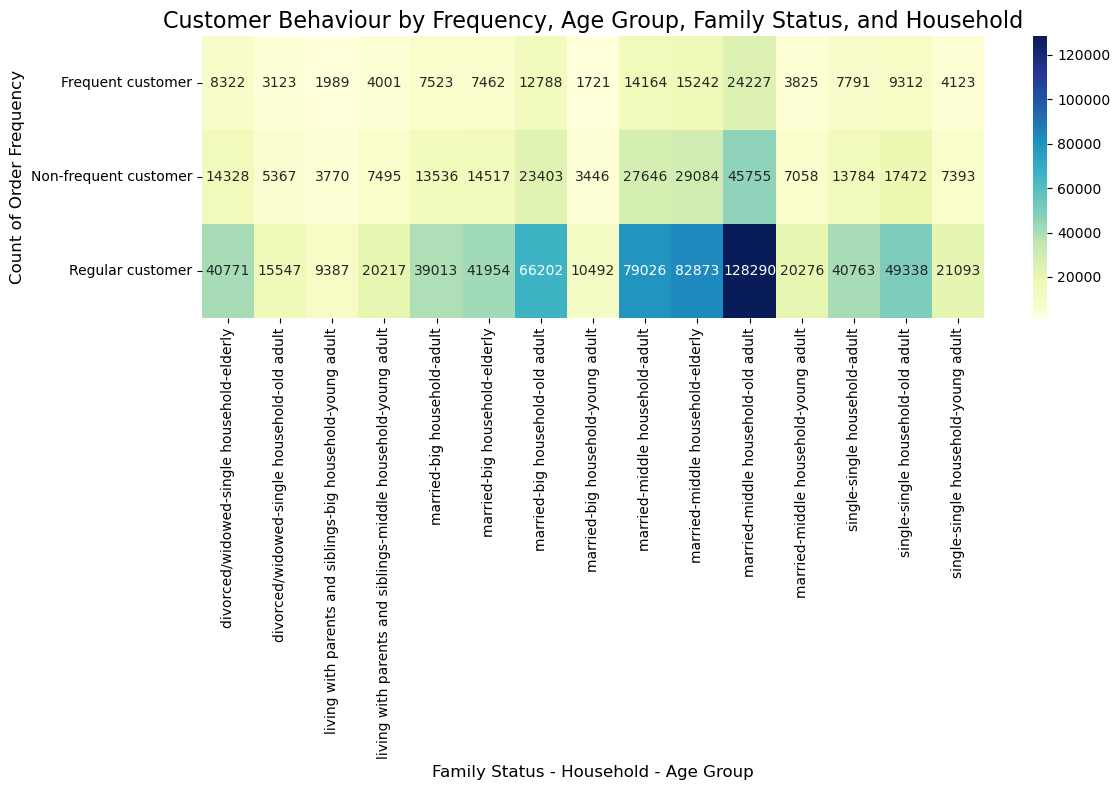

In [247]:
# Create a heatmap for visualizing the output
fig38, ax38 = plt.subplots(figsize=(12, 8))

# Plot heatmap
sns.heatmap(df_customer_profile_frequency_wide, annot=True, fmt='d', cmap='YlGnBu', ax=ax38)

# Set the title and labels
ax38.set_title('Customer Behaviour by Frequency, Age Group, Family Status, and Household', fontsize=16)
ax38.set_ylabel('Count of Order Frequency', fontsize=12)
ax38.set_xlabel('Family Status - Household - Age Group', fontsize=12)

plt.yticks(rotation=0, fontsize=10)

# Ensure layout is adjusted properly
plt.tight_layout()

plt.show()

In [248]:
# Export the visualization

fig38.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'customer_behav_frequency.png'), bbox_inches='tight')

#### 6.2.5.2 Analyze the order habits based on price

In [250]:
# Group by fam_status, household, and age_profile and calculate the mean of total_order_price
df_customer_profile_price_2 = df_customer_profile.groupby(['fam_status', 'household', 'age_profile']).agg({'total_order_price': ['mean']}).unstack(fill_value=0)

In [252]:
# Change the layout of the data frame from long to a wide format for cleaner output

df_customer_profile_price_2_wide = df_customer_profile_price_2.T

In [253]:
df_customer_profile_price_2_wide

fam_status                         divorced/widowed  \
household                          single household   
                       age_profile                    
total_order_price mean adult               0.000000   
                       elderly            76.369742   
                       old adult          77.208121   
                       young adult         0.000000   

fam_status                         living with parents and siblings  \
household                                             big household   
                       age_profile                                    
total_order_price mean adult                                0.00000   
                       elderly                              0.00000   
                       old adult                            0.00000   
                       young adult                         76.82398   

fam_status                                                married  \
household                          middle household big household   
                       age_profile                                  
total_order_price mean adult               0.000000     76.364270   
                       elderly             0.000000     76.035384   
                       old adult           0.000000     76.579516   
                       young adult        77.554016     77.468191   

fam_status                                                    single  
household                          middle household single household  
                       age_profile                                    
total_order_price mean adult              76.359452        75.420759  
                       elderly            75.944268         0.000000  
                       old adult          76.000761        75.953042  
                       young adult        74.544318        75.859824

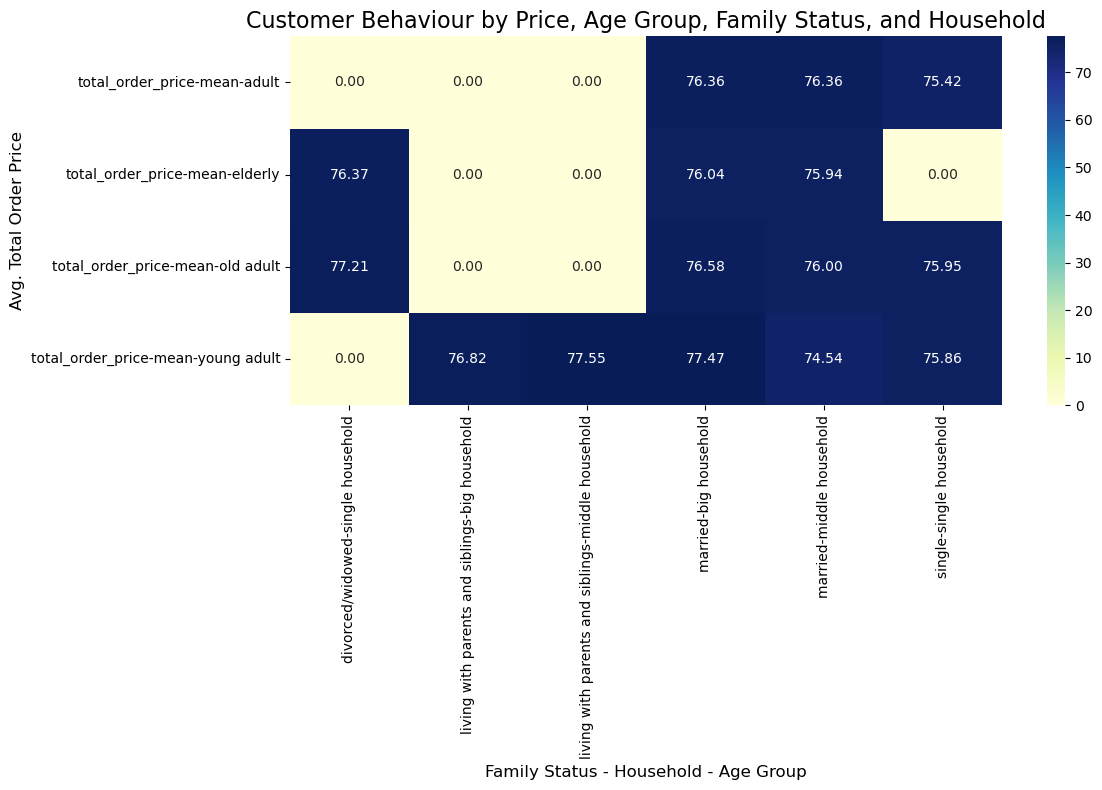

In [254]:
# Create a heatmap for visualizing the output
fig39, ax39 = plt.subplots(figsize=(12, 8))

# Plot heatmap
sns.heatmap(df_customer_profile_price_2_wide, annot=True, fmt='.2f', cmap='YlGnBu', ax=ax39)

# Set the title and labels
ax39.set_title('Customer Behaviour by Price, Age Group, Family Status, and Household', fontsize=16)
ax39.set_ylabel('Avg. Total Order Price', fontsize=12)
ax39.set_xlabel('Family Status - Household - Age Group', fontsize=12)

plt.yticks(rotation=0, fontsize=10)

# Ensure layout is adjusted properly
plt.tight_layout()

plt.show()

In [255]:
# Export the visualization

fig39.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'customer_behav_price.png'), bbox_inches='tight')

#### 6.2.5.3 Analyze the order habits based on products

In [257]:
# Create a new group for department with more distinct names

result = []
for value in Instacart_final_version["department_id"]:
    if value in[1,3,4,12,16,13,15,14,19,20,9,10]:
        result.append("Food & Groceries")
    elif value in[7,5]:
        result.append("Beverages & Alcohol")
    elif value in[11,17]:
        result.append("Household & Personal Care")
    elif value in[6,2]:
        result.append("Specialty & International")
    elif value in[18,8]:
        result.append("Baby & Pets")
    else:
        result.append("Uncategorized")

In [258]:
# Create new column for the groups

Instacart_final_version['department_new']=result

In [259]:
# Update the customer_profile data frame by adding the department_new column

df_customer_profile_update = Instacart_final_version.groupby(['user_id', 'order_number', 'days_since_last_order', 'loyalty_flag','frequency_flag', 'spending_flag', 'region', 'age_profile', 'fam_status', 'income_range', 'household', 'suitable_goods','department_new'])['prices'].sum().reset_index()

In [260]:
# Create a suitable customer profile

df_customer_profile_products = df_customer_profile_update.groupby(['fam_status', 'household', 'age_profile', 'department_new']).size().unstack(fill_value=0)

In [261]:
df_customer_profile_products

department_new                                                 Baby & Pets  \
fam_status                       household        age_profile                
divorced/widowed                 single household elderly            13939   
                                                  old adult           5395   
living with parents and siblings big household    young adult         3282   
                                 middle household young adult         7763   
married                          big household    adult              13530   
                                                  elderly            14064   
                                                  old adult          23171   
                                                  young adult         3359   
                                 middle household adult              26450   
                                                  elderly            28545   
                                                  old adult          44308   
                                                  young adult         6823   
single                           single household adult              13365   
                                                  old adult          17416   
                                                  young adult         7058   

department_new                                                 Beverages & Alcohol  \
fam_status                       household        age_profile                        
divorced/widowed                 single household elderly                    90258   
                                                  old adult                  34928   
living with parents and siblings big household    young adult                23171   
                                 middle household young adult                46778   
married                          big household    adult                      85228   
                                                  elderly                    92966   
                                                  old adult                 144387   
                                                  young adult                23471   
                                 middle household adult                     170307   
                                                  elderly                   186112   
                                                  old adult                 286129   
                                                  young adult                44101   
single                           single household adult                      86475   
                                                  old adult                 111017   
                                                  young adult                45831   

department_new                                                 Food & Groceries  \
fam_status                       household        age_profile                     
divorced/widowed                 single household elderly                184301   
                                                  old adult               70433   
living with parents and siblings big household    young adult             47506   
                                 middle household young adult             94645   
married                          big household    adult                  174266   
                                                  elderly                189033   
                                                  old adult              293481   
                                                  young adult             46810   
                                 middle household adult                  348962   
                                                  elderly                377212   
                                                  old adult              580258   
                                                  young adult             90687   
single                           single househol

In [262]:
# Change the layout of the data frame from long to a wide format for cleaner output

df_customer_profile_products_wide = df_customer_profile_products.T

In [263]:
df_customer_profile_products_wide

fam_status                divorced/widowed            \
household                 single household             
age_profile                        elderly old adult   
department_new                                         
Baby & Pets                          13939      5395   
Beverages & Alcohol                  90258     34928   
Food & Groceries                    184301     70433   
Household & Personal Care            40105     15293   
Specialty & International            14674      5863   
Uncategorized                         3238      1154   

fam_status                living with parents and siblings                   \
household                                    big household middle household   
age_profile                                    young adult      young adult   
department_new                                                                
Baby & Pets                                           3282             7763   
Beverages & Alcohol                                  23171            46778   
Food & Groceries                                     47506            94645   
Household & Personal Care                            10265            21004   
Specialty & International                             3897             7883   
Uncategorized                                          979             1829   

fam_status                      married                                \
household                 big household                                 
age_profile                       adult elderly old adult young adult   
department_new                                                          
Baby & Pets                       13530   14064     23171        3359   
Beverages & Alcohol               85228   92966    144387       23471   
Food & Groceries                 174266  189033    293481       46810   
Household & Personal Care         37960   40951     63945        9897   
Specialty & International         14102   14690     23479        3645   
Uncategorized                      3364    3657      5375         887   

fam_status                                                                \
household                 middle household                                 
age_profile                          adult elderly old adult young adult   
department_new                                                             
Baby & Pets                          26450   28545     44308        6823   
Beverages & Alcohol                 170307  186112    286129       44101   
Food & Groceries                    348962  377212    580258       90687   
Household & Personal Care            75909   81698    127078       20051   
Specialty & International            28640   30198     46358        7294   
Uncategorized                         6305    6880     11182        1739   

fam_status                          single                        
household                 single household                        
age_profile                          adult old adult young adult  
department_new                                                    
Baby & Pets                          13365     17416        7058  
Beverages & Alcohol                  86475    111017       45831  
Food & Groceries                    176164    225588       92685  
Household & Personal Care            38432     47695       19753  
Specialty & International            14386     18009        7741  
Uncategorized                         3311      4131        1748

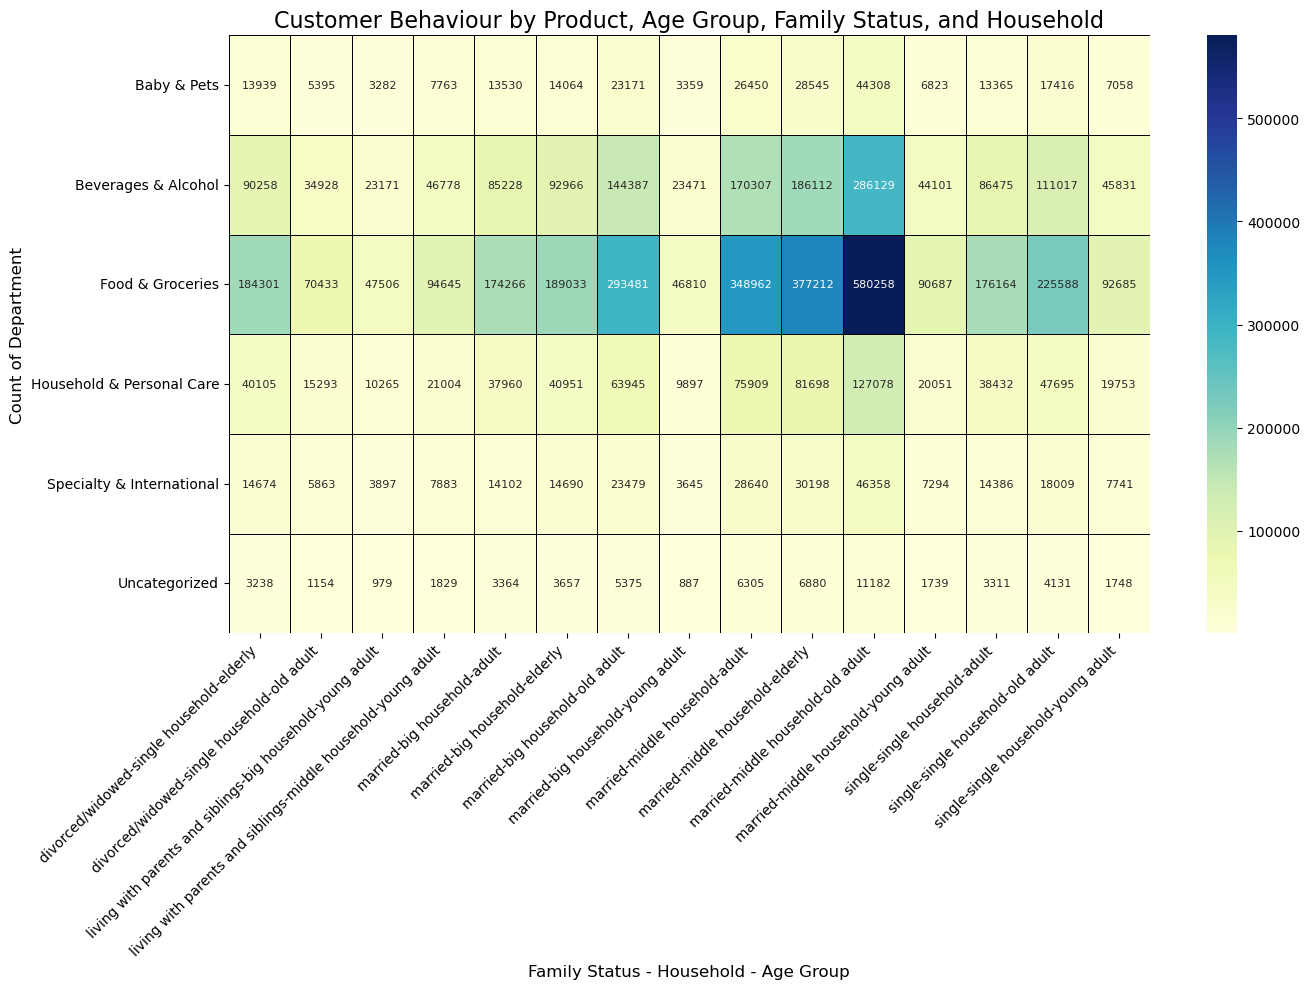

In [264]:
# Create a heatmap for visualizing the output
fig40, ax40 = plt.subplots(figsize=(14, 10))  # Adjust figure size for better visibility

# Plot heatmap
sns.heatmap(df_customer_profile_products_wide, annot=True, fmt='d', cmap='YlGnBu', ax=ax40,
            annot_kws={"size": 8}, linewidths=0.5, linecolor='black')

# Set the title and labels
ax40.set_title('Customer Behaviour by Product, Age Group, Family Status, and Household', fontsize=16)
ax40.set_ylabel('Count of Department', fontsize=12)
ax40.set_xlabel('Family Status - Household - Age Group', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust y-axis tick rotation and font size
plt.yticks(rotation=0, fontsize=10)

# Ensure layout is adjusted properly
plt.tight_layout()

plt.show()

In [265]:
# Export the visualization

fig40.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'customer_behav_product.png'), bbox_inches='tight')

### 6.3 Busiest Days in the week

In [267]:
Instacart_final_version['orders_day_of_the_week'].value_counts()

orders_day_of_the_week
0    5908610
1    5411686
6    4291304
5    4033729
2    4024706
3    3669535
4    3624994
Name: count, dtype: int64

In [268]:
# Create a new column naeming the weekdays

result = []
for value in Instacart_final_version["orders_day_of_the_week"]:
    if value in[0]:
        result.append("Sunday")
    elif value in[1]:
        result.append("Monday")
    elif value in[2]:
        result.append("Tuesday")
    elif value in[3]:
        result.append("Wednesday")
    elif value in[4]:
        result.append("Thursday")
    elif value in[5]:
        result.append("Friday")
    else:
        result.append("Saturday")

In [269]:
# Create new column for the groups

Instacart_final_version['weekdays']=result

In [270]:
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
Instacart_final_version['weekdays'] = pd.Categorical(Instacart_final_version['weekdays'], categories=days_order, ordered=True)

In [271]:
order_days_counts = Instacart_final_version.groupby('weekdays')['order_id'].count().reset_index()

/var/folders/y8/whbdk63x63398jrksgc7pp0r0000gn/T/ipykernel_11130/1465887413.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_days_counts = Instacart_final_version.groupby('weekdays')['order_id'].count().reset_index()


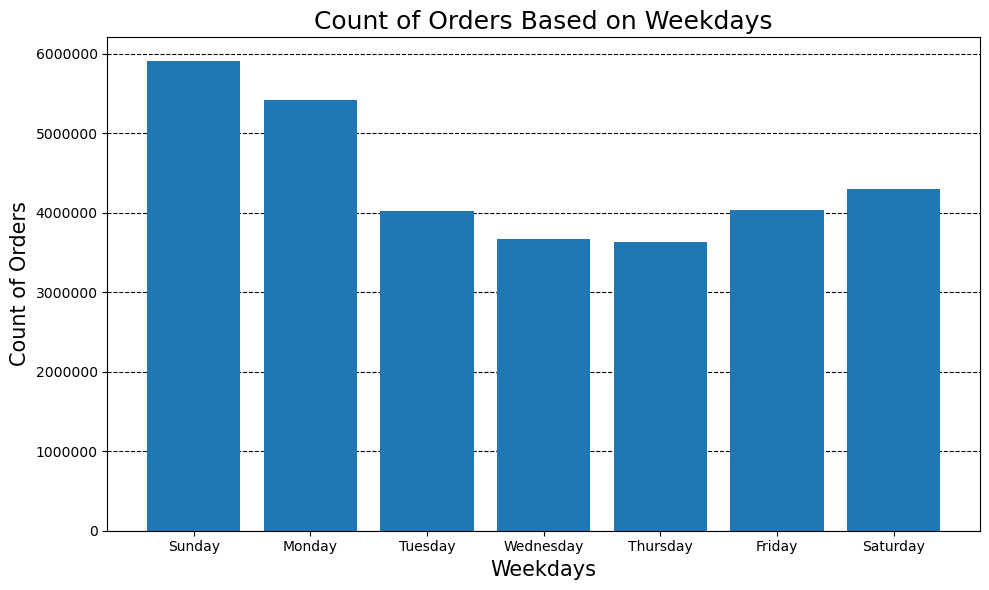

In [403]:
# Create a bar chart

fig41, ax41 = plt.subplots(figsize=(10,6))

# Creating the bar chart
ax41.bar(order_days_counts['weekdays'], order_days_counts['order_id'])

# Setting grid, labels, and title
ax41.set_axisbelow(True)
ax41.grid(axis='y', color='black', linestyle='dashed')

# Using ax12 for the labels and title
ax41.set_xlabel('Weekdays', fontsize=15)
ax41.set_ylabel('Count of Orders', fontsize=15)
ax41.set_title('Count of Orders Based on Weekdays', fontsize=18)
ax41.grid(axis='y', color='black', linestyle='dashed')

ax41.ticklabel_format(style='plain', axis='y')
                
plt.tight_layout()
plt.show()

In [405]:
# Export the visualization

fig41.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'busiest_weekday.png'), bbox_inches='tight')

### 6.4 Busiest Hours of the Day

In [275]:
order_hours_counts = Instacart_final_version.groupby('order_hour_of_day')['order_id'].count().reset_index()

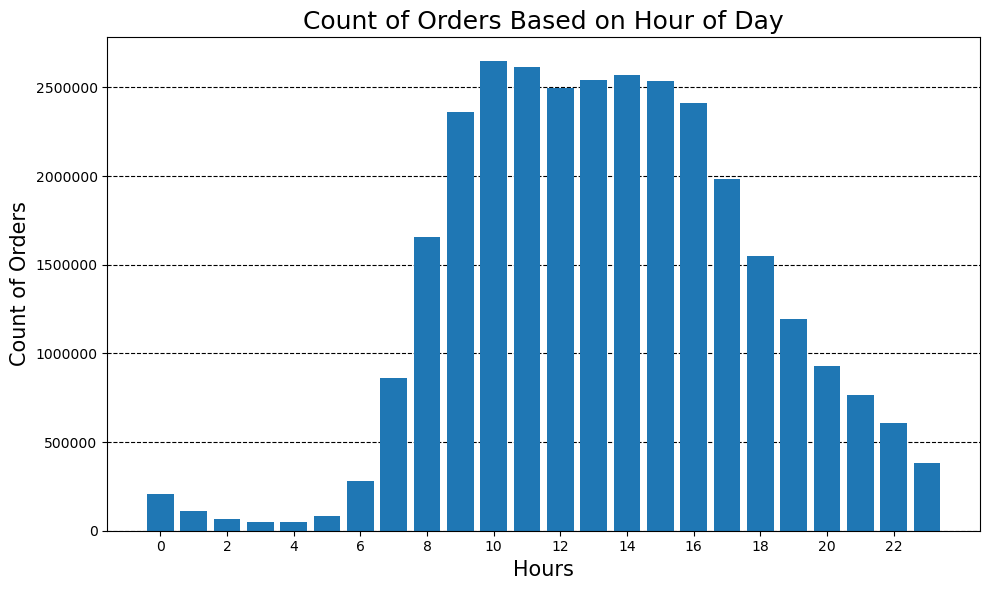

In [399]:
# Create a bar chart

fig42, ax42 = plt.subplots(figsize=(10,6))

# Creating the bar chart
ax42.bar(order_hours_counts['order_hour_of_day'], order_hours_counts['order_id'])

# Setting grid, labels, and title
ax42.set_axisbelow(True)
ax42.grid(axis='y', color='black', linestyle='dashed')
ax42.set_xticks(np.arange(0, 24, 2))

# Using ax12 for the labels and title
ax42.set_xlabel('Hours', fontsize=15)
ax42.set_ylabel('Count of Orders', fontsize=15)
ax42.set_title('Count of Orders Based on Hour of Day', fontsize=18)
ax42.grid(axis='y', color='black', linestyle='dashed')

ax42.ticklabel_format(style='plain', axis='y')
                
plt.tight_layout()
plt.show()

In [401]:
# Export the visualization

fig42.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'busiest_hour_day.png'), bbox_inches='tight')

### 6.5 Difference in Expenditure depending on the Hour of the Day

In [377]:
expenditure_hours_counts = Instacart_final_version.groupby('order_hour_of_day')['prices'].sum().reset_index()

In [379]:
expenditure_hours_counts

,order_hour_of_day,prices
0,0,1625007.5
1,1,855655.6
2,2,512533.9
3,3,381978.4
4,4,398014.7
5,5,660968.6
6,6,2197137.1
7,7,6750581.7
8,8,12922482.5
9,9,18320180.5


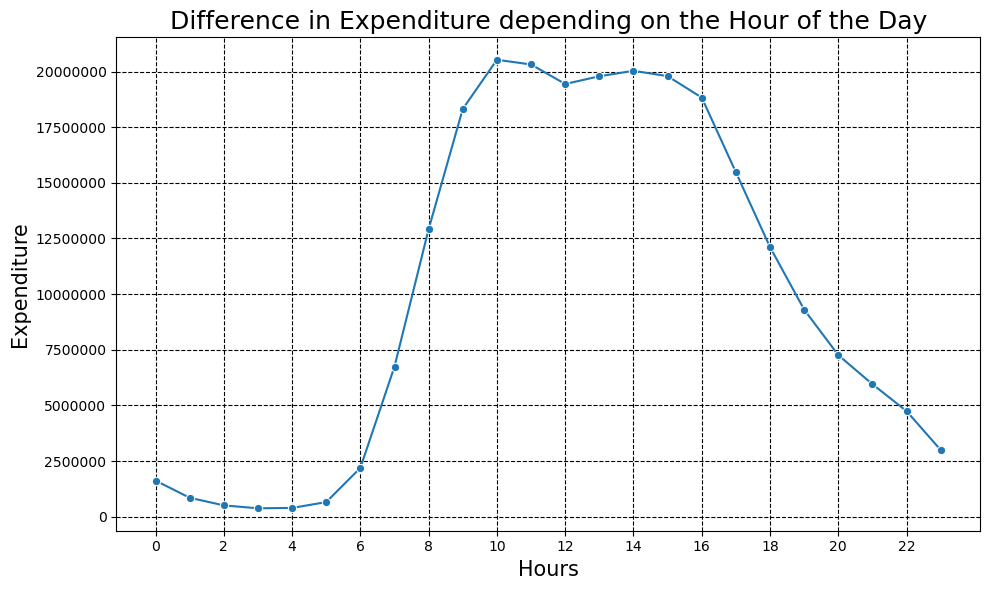

In [391]:
# Plot a ;ine chart to show the expenditure of customers per hour of the day

fig43, ax43 = plt.subplots(figsize=(10,6))
line = sns.lineplot(data = expenditure_hours_counts, x='order_hour_of_day', y='prices', ax=ax43, marker='o')
                    
# Set labels and titles
ax43.set_xlabel('Hours', fontsize=15)
ax43.set_ylabel('Expenditure', fontsize=15)
ax43.set_title('Difference in Expenditure depending on the Hour of the Day', fontsize=18)
ax43.grid(axis='both', color='black', linestyle='dashed')

ax43.ticklabel_format(style='plain', axis='y')
ax43.set_xticks(np.arange(0, 24, 2))
ax43.grid(axis='both', color='black', linestyle='dashed')

plt.tight_layout()
plt.show()

In [393]:
# Export the visualization

fig43.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Task 10', 'expenditure_hour.png'), bbox_inches='tight')

## 7. Exporting Data

In [279]:
#Determine unnecessary columns, and columns that include PII data before exporting the final data frame

df_final_version.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_day_update', 'busiest_hours_of_the_day', 'max_order',
       'loyalty_flag', 'average_prices', 'spending_flag',
       'median_days_since_last_order', 'frequency_flag', 'first_name',
       'last_name', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'fam_status', 'income', 'merge_indicator',
       'region', 'age_profile', 'income_range', 'household', 'suitable_goods',
       'department', '_merge', 'hour_group'],
      dtype='object')

In [280]:
# Drop the columns
df_final_version_drop = df_final_version.drop(columns=['first_name', 'last_name', 'merge_indicator', '_merge'])

In [281]:
df_final_version_drop

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,number_of_dependents,fam_status,income,region,age_profile,income_range,household,suitable_goods,department,hour_group
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,3,married,40423,South,adult,low income,big household,more suitable,beverages,Morning
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,3,married,40423,South,adult,low income,big household,more suitable,dairy eggs,Morning
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,...,3,married,40423,South,adult,low income,big household,more suitable,snacks,Morning
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,...,3,married,40423,South,adult,low income,big household,more suitable,snacks,Morning
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,3,married,40423,South,adult,low income,big household,more suitable,household,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30964559,2977660,206209,13,1,12,7.0,14197,5,1,Tomato Paste,...,3,married,137969,Midwest,elderly,upper income,big household,more suitable,dry goods pasta,Afternoon
30964560,2977660,206209,13,1,12,7.0,38730,6,0,Brownie Crunch High Protein Bar,...,3,married,137969,Midwest,elderly,upper income,big household,more suitable,snacks,Afternoon
30964561,2977660,206209,13,1,12,7.0,31477,7,0,High Protein Bar Chunky Peanut Butter,...,3,married,137969,Midwest,elderly,upper income,big household,more suitable,snacks,Afternoon
30964562,2977660,206209,13,1,12,7.0,6567,8,0,Chocolate Peanut Butter Protein Bar,...,3,married,137969,Midwest,elderly,upper income,big household,more suitable,snacks,Afternoon


In [371]:
# Drop the columns
Instacart_final_version_drop = Instacart_final_version.drop(columns=['suitable_goods'])

In [373]:
Instacart_final_version_drop.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_day_update', 'busiest_hours_of_the_day', 'max_order',
       'loyalty_flag', 'average_prices', 'spending_flag',
       'median_days_since_last_order', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'number_of_dependents', 'fam_status', 'income',
       'region', 'age_profile', 'income_range', 'household', 'department',
       'hour_group', 'department_new', 'weekdays'],
      dtype='object')

In [282]:
# Export the final data frame

df_final_version_drop.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Instacart_final_version.pkl'))

In [375]:
# Export the final data frame

Instacart_final_version_drop.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Instacart_final_version.pkl'))